In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib
import os
matplotlib.use('Agg')
%matplotlib inline
from gather_metrics import *
import pandas as pd
pd.set_option('precision', 4)
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

model_directory = '../../../job_results_small/'
class_dirs = [model_directory+'/random_forest/stage_2/',
              model_directory+'/irv/stage_2/',
              model_directory+'/neural_networks/stage_2/',
              model_directory+'/docking/stage_2/',
              model_directory+'/baseline/stage_2/']
k = 5

In [2]:
#setup gather matrix
gather_df = gather_dir_metrics(class_dirs[0], 1)     
gather_df = gather_df.append(gather_dir_metrics(class_dirs[1], 1))   
gather_df = gather_df.append(gather_dir_metrics(class_dirs[2], 1))
gather_df = gather_df.append(gather_dir_metrics(class_dirs[3], 1))
gather_df = gather_df.append(gather_dir_metrics(class_dirs[4], 1))

col_indices = list(range(10)) + list(range(15, 20)) + list(range(25, 65)) + list(range(145, 149)) + list(range(150, 183))
col_indices = [i for i in col_indices if 'Mean' not in gather_df.columns[i] and 'Median' not in gather_df.columns[i]]
col_indices = [i for i in col_indices if 'PriA-SSB AS' in gather_df.columns[i]]
metric_names = list(gather_df.columns.values[col_indices])

gather_df = gather_df[metric_names]
gather_df = gather_df.dropna(axis=0)

#setup comparison matrix and overlaps
mm_comp_dicts = get_mean_median_comps(gather_df, col_indices=[i for i in range(len(metric_names))])
agg_comp_dict = get_agg_comp(mm_comp_dicts, None, mean_w=1, median_w=0, tukey_w=0)
overlapping_models = get_overlap(agg_comp_dict, N=1)

---
## Model Ordering by Metric (Best-to-Worst)
Shows table with model-winscore pairs in the cells.

In [3]:
ordered_df = get_model_ordering(agg_comp_dict, metric_names)
ordered_df

,ROC AUC PriA-SSB AS,BEDROC AUC PriA-SSB AS,PR auc.integral PriA-SSB AS,NEF_0.1 % PriA-SSB AS,NEF_0.15 % PriA-SSB AS,NEF_0.5 % PriA-SSB AS,NEF_1 % PriA-SSB AS,NEF_2 % PriA-SSB AS,NEF_5 % PriA-SSB AS,NEF_10 % PriA-SSB AS,NEF_20 % PriA-SSB AS,NEF AUC PriA-SSB AS,n_hits_100 PriA-SSB AS,n_hits_250 PriA-SSB AS,n_hits_500 PriA-SSB AS,n_hits_1000 PriA-SSB AS,n_hits_2500 PriA-SSB AS,n_hits_5000 PriA-SSB AS,n_hits_10000 PriA-SSB AS
0,"SingleRegression_a, 1.0","SingleRegression_a, 1.0","RandomForest_h, 1.0","SingleClassification_b, 1.0","RandomForest_g, 1.0","RandomForest_h, 1.0","RandomForest_h, 1.0","SingleRegression_a, 1.0","SingleRegression_a, 1.0","SingleRegression_a, 1.0","SingleRegression_a, 1.0","SingleRegression_a, 1.0","RandomForest_h, 1.0","RandomForest_h, 1.0","SingleRegression_a, 1.0","SingleRegression_b, 1.0","SingleRegression_a, 1.0","SingleRegression_a, 1.0","SingleRegression_b, 1.0"
1,"SingleRegression_b, 2.0","SingleRegression_b, 2.0","RandomForest_g, 2.0","RandomForest_h, 1.0","RandomForest_h, 2.0","RandomForest_g, 1.0","RandomForest_g, 2.0","SingleRegression_b, 2.0","SingleRegression_b, 1.0","SingleRegression_b, 2.0","SingleRegression_b, 2.0","SingleRegression_b, 2.0","RandomForest_g, 1.0","RandomForest_g, 2.0","SingleRegression_b, 2.0","SingleRegression_a, 2.0","SingleRegression_b, 2.0","SingleRegression_b, 2.0","SingleRegression_a, 2.0"
2,"RandomForest_h, 3.0","RandomForest_g, 3.0","RandomForest_d, 3.0","RandomForest_g, 1.0","SingleClassification_b, 3.0","RandomForest_a, 3.0","RandomForest_e, 3.0","RandomForest_h, 2.0","IRV_e, 3.0","RandomForest_h, 3.0","RandomForest_d, 3.0","RandomForest_h, 3.0","RandomForest_e, 3.0","RandomForest_e, 3.0","RandomForest_h, 2.0","RandomForest_e, 3.0","RandomForest_g, 3.0","RandomForest_d, 3.0","RandomForest_h, 3.0"
3,"RandomForest_d, 4.0","RandomForest_h, 4.0","RandomForest_e, 4.0","MultiClassification_a, 4.0","RandomForest_d, 4.0","RandomForest_e, 4.0","RandomForest_c, 3.0","RandomForest_g, 2.0","RandomForest_g, 4.0","RandomForest_g, 4.0","RandomForest_c, 3.0","RandomForest_g, 4.0","RandomForest_d, 3.0","RandomForest_c, 3.0","RandomForest_g, 2.0","IRV_e, 4.0","RandomForest_d, 3.0","RandomForest_c, 3.0","baseline, 4.0"
4,"RandomForest_g, 5.0","RandomForest_d, 5.0","RandomForest_c, 5.0","RandomForest_f, 4.0","RandomForest_e, 4.0","RandomForest_d, 4.0","RandomForest_b, 3.0","RandomForest_b, 5.0","RandomForest_a, 4.0","RandomForest_d, 4.0","RandomForest_h, 5.0","RandomForest_d, 5.0","RandomForest_c, 5.0","RandomForest_b, 3.0","RandomForest_b, 5.0","RandomForest_a, 4.0","RandomForest_h, 5.0","RandomForest_h, 5.0","RandomForest_g, 5.0"
5,"RandomForest_e, 6.0","RandomForest_e, 6.0","RandomForest_b, 6.0","RandomForest_d, 6.0","MultiClassification_a, 4.0","RandomForest_c, 4.0","RandomForest_a, 3.0","RandomForest_a, 5.0","RandomForest_b, 6.0","RandomForest_e, 6.0","RandomForest_g, 5.0","RandomForest_e, 6.0","RandomForest_b, 6.0","RandomForest_a, 3.0","RandomForest_a, 5.0","RandomForest_h, 6.0","RandomForest_e, 5.0","RandomForest_g, 5.0","RandomForest_f, 6.0"
6,"baseline, 7.0","RandomForest_c, 7.0","RandomForest_a, 7.0","RandomForest_a, 6.0","RandomForest_c, 4.0","RandomForest_b, 4.0","RandomForest_d, 7.0","RandomForest_e, 5.0","RandomForest_h, 6.0","IRV_e, 7.0","RandomForest_e, 5.0","RandomForest_a, 7.0","RandomForest_a, 6.0","RandomForest_d, 7.0","RandomForest_e, 5.0","RandomForest_g, 6.0","IRV_e, 7.0","RandomForest_e, 5.0","RandomForest_e, 6.0"
7,"RandomForest_b, 8.0","RandomForest_b, 8.0","SingleRegression_b, 8.0","RandomForest_e, 6.0","RandomForest_b, 4.0","SingleClassification_b, 8.0","SingleRegression_a, 8.0","RandomForest_c, 5.0","RandomForest_e, 6.0","RandomForest_b, 7.0","baseline, 8.0","RandomForest_c, 8.0","SingleClassification_b, 8.0","SingleRegression_a, 8.0","RandomForest_c, 5.0","RandomForest_d, 6.0","RandomForest_b, 7.0","baseline, 8.0","RandomForest_d, 6.0"
8,"RandomForest_c, 9.0","RandomForest_a, 9.0","SingleClassification_b, 9.0","RandomForest_c, 6.0","RandomForest_f, 9.0"

---
## Metrics Most Similar to N-Hits

In [4]:
get_similar_to_nhits(agg_comp_dict, metric_names[:-7], metric_names[-7:])

,n_hits_100 PriA-SSB AS,n_hits_250 PriA-SSB AS,n_hits_500 PriA-SSB AS,n_hits_1000 PriA-SSB AS,n_hits_2500 PriA-SSB AS,n_hits_5000 PriA-SSB AS,n_hits_10000 PriA-SSB AS
0,NEF_0.5 %,NEF_1 %,NEF_2 %,NEF_5 %,NEF_10 %,NEF_20 %,ROC AUC
1,NEF_1 %,NEF_0.5 %,NEF_5 %,NEF_2 %,BEDROC AUC,ROC AUC,NEF_20 %
2,NEF_0.15 %,NEF_2 %,"BEDROC AUC, NEF_10 %, NEF AUC",NEF_10 %,NEF AUC,"BEDROC AUC, NEF AUC",NEF_10 %
3,NEF_0.1 %,NEF_0.1 %,NEF_1 %,NEF AUC,NEF_5 %,NEF_10 %,"BEDROC AUC, NEF AUC"
4,PR auc.integral,NEF_0.15 %,NEF_0.5 %,BEDROC AUC,ROC AUC,"PR auc.integral, NEF_2 %",PR auc.integral
5,NEF_2 %,PR auc.integral,NEF_20 %,NEF_20 %,"NEF_2 %, NEF_20 %",NEF_5 %,NEF_2 %
6,NEF AUC,"NEF_5 %, NEF AUC",ROC AUC,NEF_1 %,PR auc.integral,NEF_0.15 %,NEF_5 %
7,"BEDROC AUC, NEF_10 %",BEDROC AUC,PR auc.integral,ROC AUC,NEF_0.1 %,NEF_0.1 %,NEF_0.1 %
8,NEF_20 %,NEF_10 %,NEF_0.1 %,NEF_0.5 %,NEF_0.15 %,NEF_1 %,NEF_0.15 %
9,NEF_5 %,NEF_20 %,NEF_0.15 %,"PR auc.integral, NEF_0.1 %","NEF_0.5 %, NEF_1 %",NEF_0.5 %,NEF_1 %


---
## Overlapping top N models over all metrics

In [5]:
get_overlap(agg_comp_dict, N=1)

,overlap_perc
SingleRegression_a,0.526316
RandomForest_h,0.315789
RandomForest_g,0.210526
SingleRegression_b,0.157895
SingleClassification_b,0.052632


In [6]:
get_overlap(agg_comp_dict, N=5)

,overlap_perc
RandomForest_g,0.947368
RandomForest_h,0.894737
SingleRegression_a,0.631579
RandomForest_e,0.631579
SingleRegression_b,0.631579
RandomForest_d,0.578947
RandomForest_c,0.526316
RandomForest_a,0.368421
RandomForest_b,0.315789
MultiClassification_a,0.105263


## Spearman's Rank-order correlation coefficient 

In [7]:
spearman_df, ordered_spearman_df = get_spearman_r(agg_comp_dict, metric_names[:-7], metric_names[-7:])

In [8]:
ordered_spearman_df

,n_hits_100 PriA-SSB AS,n_hits_250 PriA-SSB AS,n_hits_500 PriA-SSB AS,n_hits_1000 PriA-SSB AS,n_hits_2500 PriA-SSB AS,n_hits_5000 PriA-SSB AS,n_hits_10000 PriA-SSB AS
0,NEF_0.5 %,NEF_1 %,NEF_2 %,NEF_5 %,NEF_10 %,NEF_20 %,ROC AUC
1,NEF_1 %,NEF_0.5 %,NEF AUC,NEF_2 %,BEDROC AUC,BEDROC AUC,NEF_20 %
2,NEF_0.15 %,NEF_2 %,BEDROC AUC,NEF AUC,NEF AUC,ROC AUC,BEDROC AUC
3,PR auc.integral,PR auc.integral,NEF_5 %,BEDROC AUC,ROC AUC,NEF AUC,NEF AUC
4,NEF_2 %,NEF AUC,NEF_10 %,NEF_10 %,NEF_20 %,NEF_10 %,NEF_10 %
5,NEF_0.1 %,BEDROC AUC,NEF_1 %,ROC AUC,NEF_5 %,PR auc.integral,PR auc.integral
6,NEF AUC,NEF_10 %,ROC AUC,NEF_20 %,PR auc.integral,NEF_2 %,NEF_5 %
7,BEDROC AUC,NEF_5 %,PR auc.integral,PR auc.integral,NEF_2 %,NEF_5 %,NEF_2 %
8,NEF_10 %,NEF_20 %,NEF_20 %,NEF_1 %,NEF_1 %,NEF_1 %,NEF_1 %
9,NEF_5 %,NEF_0.15 %,NEF_0.5 %,NEF_0.5 %,NEF_0.5 %,NEF_0.5 %,NEF_0.1 %


In [9]:
spearman_df

,n_hits_100 PriA-SSB AS,n_hits_250 PriA-SSB AS,n_hits_500 PriA-SSB AS,n_hits_1000 PriA-SSB AS,n_hits_2500 PriA-SSB AS,n_hits_5000 PriA-SSB AS,n_hits_10000 PriA-SSB AS
ROC AUC,0.846006,0.877038,0.925892,0.924352,0.969924,0.980610,0.979689
BEDROC AUC,0.894754,0.921569,0.954766,0.949527,0.993753,0.981125,0.964083
PR auc.integral,0.928943,0.933738,0.925504,0.906408,0.953179,0.952136,0.924875
NEF_0.1 %,0.916948,0.879741,0.844932,0.803476,0.849958,0.830192,0.815084
NEF_0.15 %,0.945564,0.894287,0.855322,0.809252,0.852018,0.836383,0.808006
NEF_0.5 %,0.982903,0.965229,0.915434,0.873140,0.866299,0.842432,0.809698
NEF_1 %,0.966050,0.999025,0.936769,0.892847,0.900926,0.888794,0.854461
NEF_2 %,0.917079,0.939217,0.999284,0.958011,0.938947,0.922219,0.902877
NEF_5 %,0.869342,0.895944,0.951989,0.989131,0.960882,0.910054,0.908021
NEF_10 %,0.885998,0.910998,0.946361,0.948445,0.998646,0.968019,0.954303


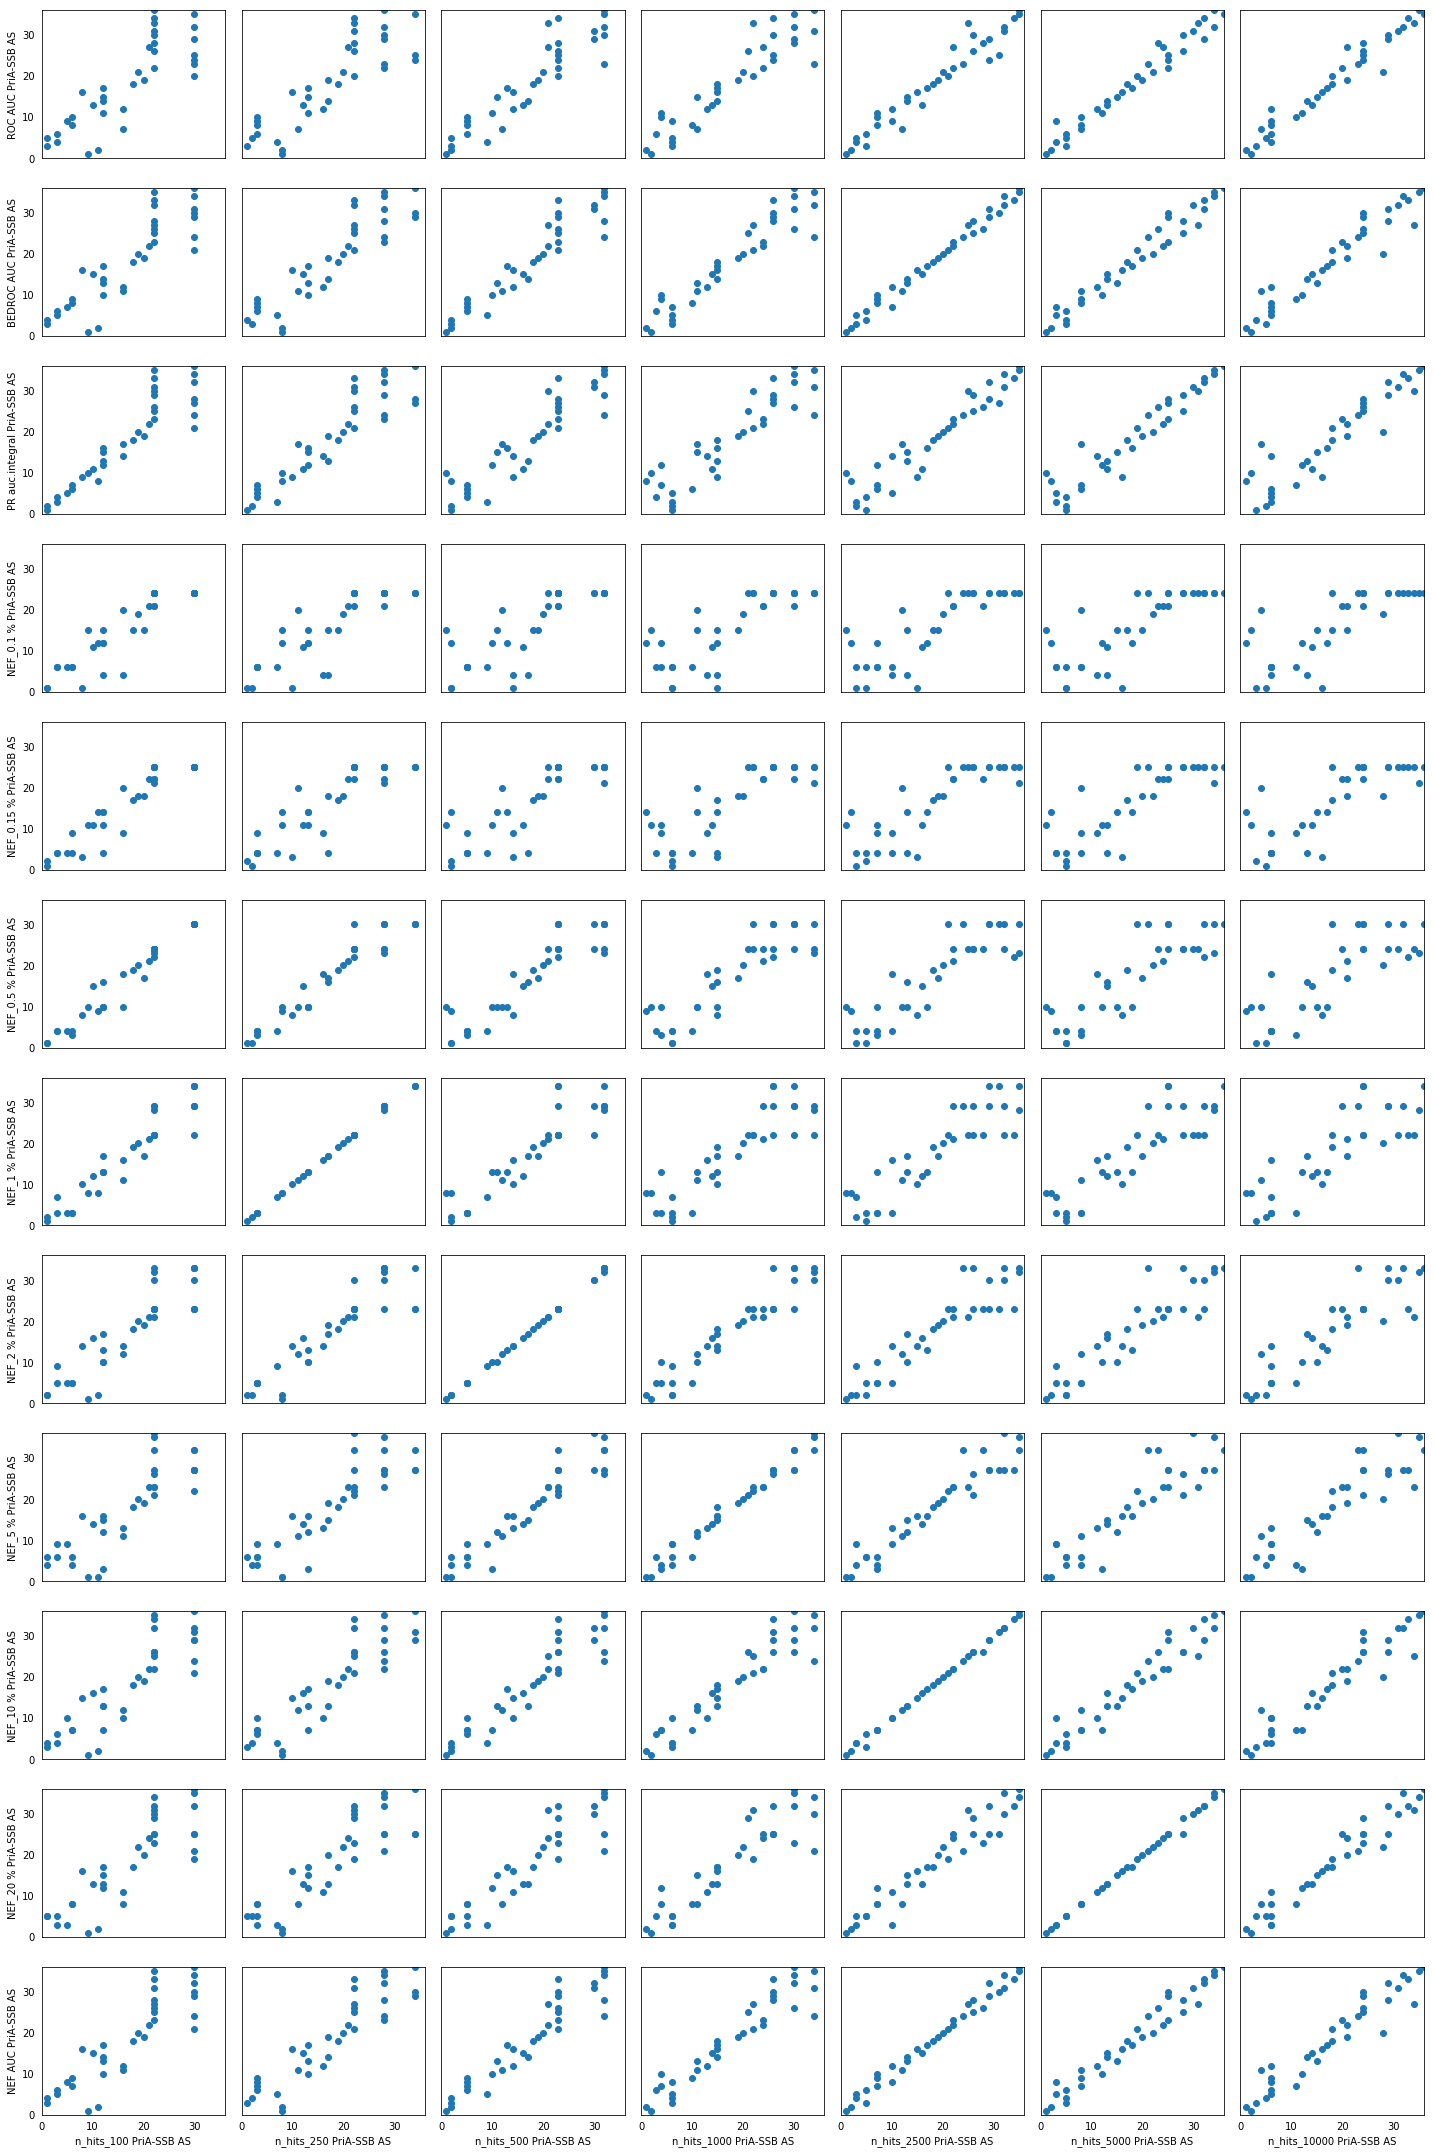

In [10]:
labels=['PriA-SSB AS']
matplotlib.rcParams.update({'font.size': 10})
if not os.path.exists('./cv_ps_figures/ps_scatter_plots_nhits/'):
    os.makedirs('./cv_ps_figures/ps_scatter_plots_nhits/')
for l in labels:
    curr_metrics = [m for m in metric_names[:-7] if l in m]
    curr_hits = [m for m in metric_names[-7:] if l in m]
    file_name = './cv_ps_figures/ps_scatter_plots_nhits/' + l.replace(' ', '_') + '.png'
    plot_scatter_nhits_alt(agg_comp_dict, curr_metrics, curr_hits, file_name, figsize=(20,30))

## Metric Scores and Plots

In [11]:
get_model_ordering_mscores(gather_df, metric_names)

,ROC AUC PriA-SSB AS,BEDROC AUC PriA-SSB AS,PR auc.integral PriA-SSB AS,NEF_0.1 % PriA-SSB AS,NEF_0.15 % PriA-SSB AS,NEF_0.5 % PriA-SSB AS,NEF_1 % PriA-SSB AS,NEF_2 % PriA-SSB AS,NEF_5 % PriA-SSB AS,NEF_10 % PriA-SSB AS,NEF_20 % PriA-SSB AS,NEF AUC PriA-SSB AS,n_hits_100 PriA-SSB AS,n_hits_250 PriA-SSB AS,n_hits_500 PriA-SSB AS,n_hits_1000 PriA-SSB AS,n_hits_2500 PriA-SSB AS,n_hits_5000 PriA-SSB AS,n_hits_10000 PriA-SSB AS
0,"SingleRegression_a, 0.8899139096","SingleRegression_a, 0.653182080646","RandomForest_h, 0.248639521591","SingleClassification_b, 0.56","RandomForest_g, 0.594594594595","RandomForest_g, 0.404761904762","RandomForest_h, 0.488095238095","SingleRegression_a, 0.559523809524","SingleRegression_b, 0.642857142857","SingleRegression_a, 0.714285714286","SingleRegression_a, 0.797619047619","SingleRegression_a, 0.677951608752","RandomForest_g, 32.0","RandomForest_h, 41.0","SingleRegression_a, 47.0","SingleRegression_b, 54.0","SingleRegression_a, 60.0","SingleRegression_a, 67.0","SingleRegression_b, 76.0"
1,"SingleRegression_b, 0.882700649222","SingleRegression_b, 0.636670655301","RandomForest_g, 0.247225097218","RandomForest_g, 0.56","RandomForest_h, 0.567567567568","RandomForest_h, 0.404761904762","RandomForest_g, 0.47619047619","SingleRegression_b, 0.52380952381","SingleRegression_a, 0.642857142857","SingleRegression_b, 0.690476190476","SingleRegression_b, 0.761904761905","SingleRegression_b, 0.656555743243","RandomForest_h, 32.0","RandomForest_g, 40.0","SingleRegression_b, 44.0","SingleRegression_a, 53.0","SingleRegression_b, 58.0","SingleRegression_b, 64.0","SingleRegression_a, 75.0"
2,"RandomForest_h, 0.837674236196","RandomForest_g, 0.617377983492","RandomForest_d, 0.196013843226","RandomForest_h, 0.56","SingleClassification_b, 0.540540540541","RandomForest_a, 0.392857142857","RandomForest_a, 0.464285714286","RandomForest_g, 0.52380952381","IRV_e, 0.619047619048","RandomForest_h, 0.678571428571","RandomForest_c, 0.738095238095","RandomForest_h, 0.637744723295","RandomForest_d, 31.0","RandomForest_a, 39.0","RandomForest_g, 44.0","RandomForest_e, 50.0","RandomForest_d, 56.0","RandomForest_c, 62.0","RandomForest_h, 71.0"
3,"RandomForest_d, 0.826112985381","RandomForest_h, 0.613816380695","RandomForest_e, 0.195338852317","RandomForest_f, 0.52","RandomForest_b, 0.432432432432","RandomForest_b, 0.380952380952","RandomForest_b, 0.464285714286","RandomForest_h, 0.52380952381","RandomForest_g, 0.607142857143","RandomForest_d, 0.666666666667","RandomForest_d, 0.738095238095","RandomForest_g, 0.63548523166","RandomForest_e, 31.0","RandomForest_b, 39.0","RandomForest_h, 44.0","IRV_e, 49.0","RandomForest_g, 56.0","RandomForest_d, 62.0","baseline, 68.0"
4,"RandomForest_g, 0.82492534422","RandomForest_d, 0.609478007383","RandomForest_c, 0.19285982985","MultiClassification_a, 0.52","RandomForest_c, 0.432432432432","RandomForest_c, 0.380952380952","RandomForest_c, 0.464285714286","RandomForest_b, 0.511904761905","RandomForest_a, 0.607142857143","RandomForest_g, 0.666666666667","RandomForest_e, 0.714285714286","RandomForest_d, 0.631174324324","RandomForest_c, 29.0","RandomForest_c, 39.0","RandomForest_b, 43.0","RandomForest_a, 49.0","RandomForest_e, 55.0","RandomForest_e, 60.0","RandomForest_g, 67.0"
5,"RandomForest_e, 0.81925646623","RandomForest_e, 0.606453238554","RandomForest_b, 0.191177746723","RandomForest_a, 0.48","RandomForest_d, 0.432432432432","RandomForest_d, 0.380952380952","RandomForest_e, 0.464285714286","RandomForest_c, 0.511904761905","RandomForest_b, 0.595238095238","RandomForest_e, 0.654761904762","RandomForest_g, 0.714285714286","RandomForest_e, 0.624775514801","RandomForest_a, 28.0","RandomForest_e, 39.0","RandomForest_c, 43.0","RandomForest_c, 48.0","RandomForest_h, 55.0","RandomForest_g, 60.0","RandomForest_b, 66.0"
6,"baseline, 0.814379270263","RandomForest_c, 0.599518941791","RandomForest_a, 0.189115541234","RandomForest_b, 0.48","RandomForest_e, 0.432432432432","RandomForest_e, 0.380952380952","RandomFor

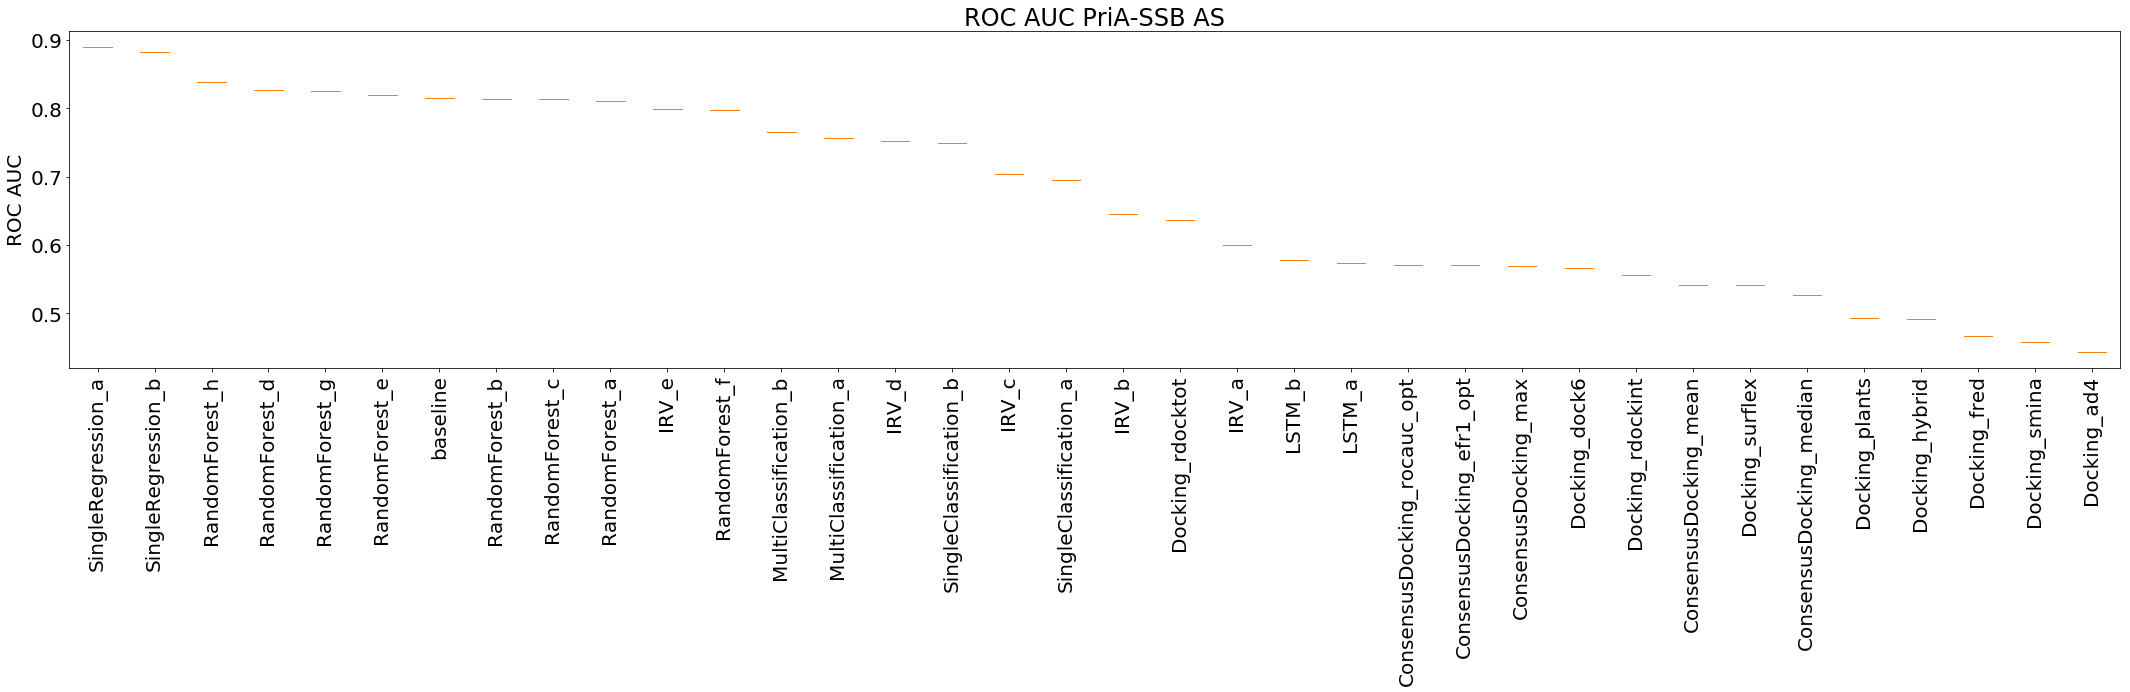

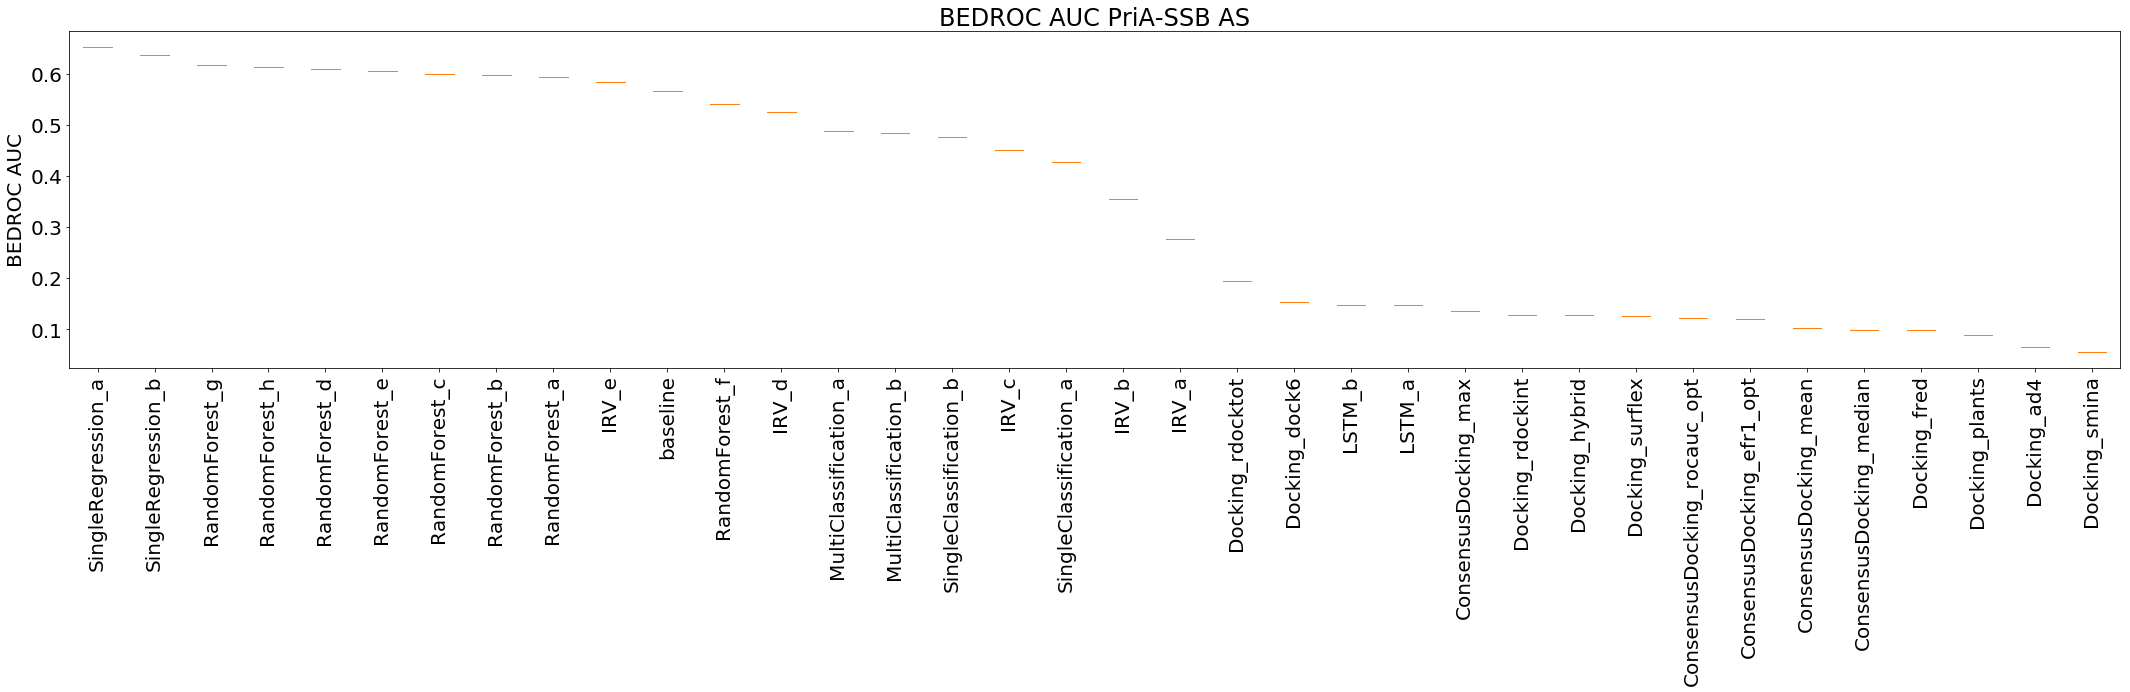

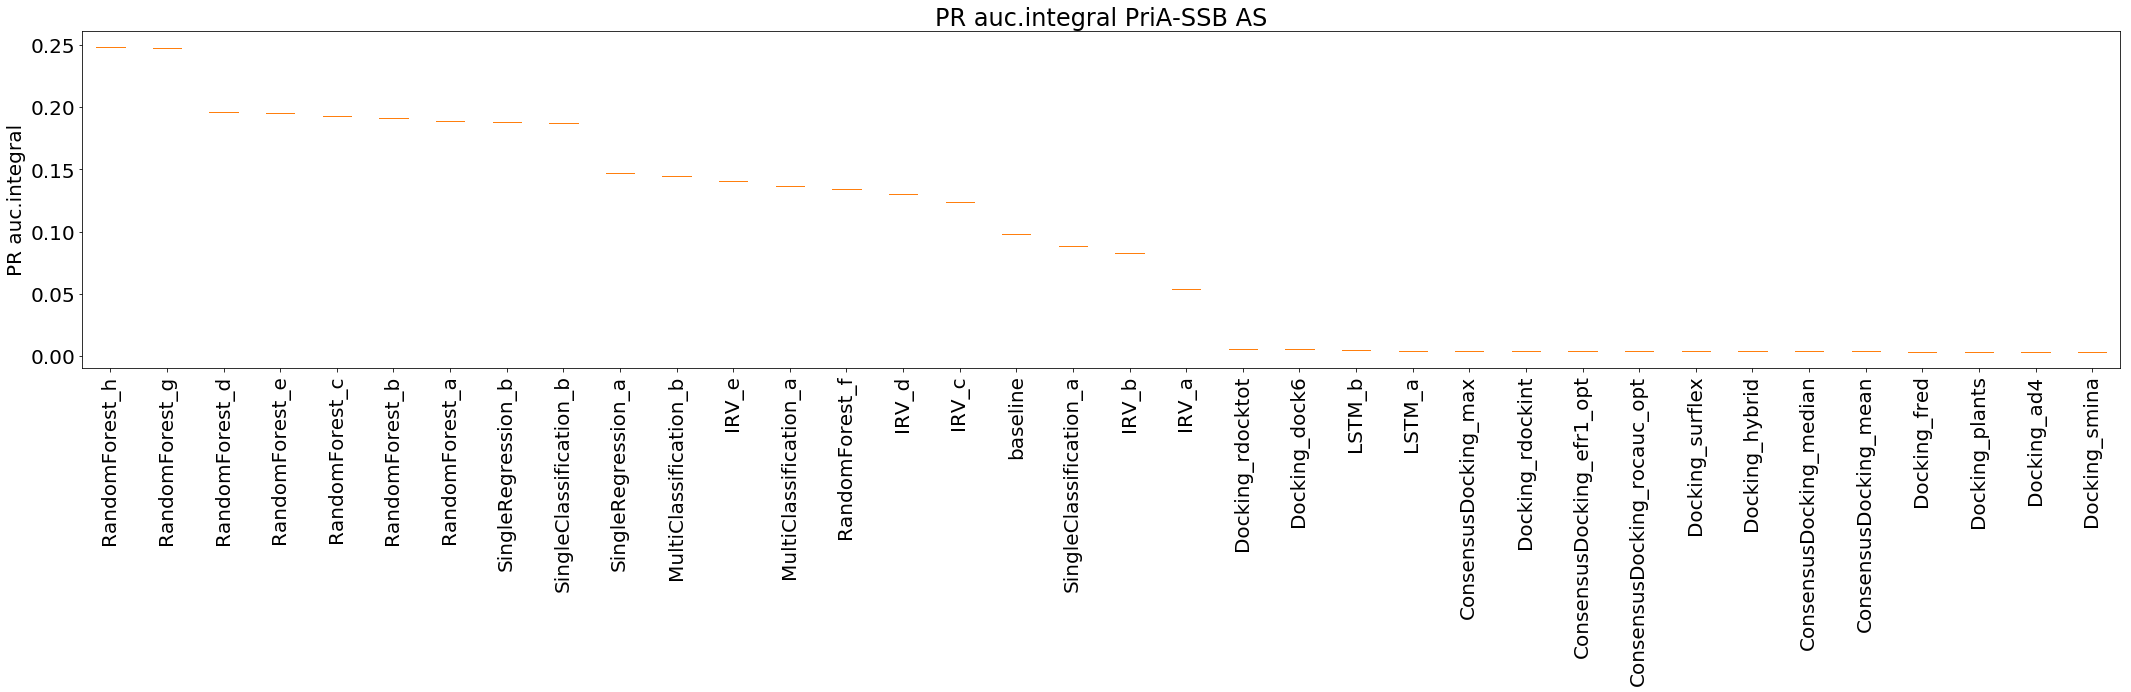

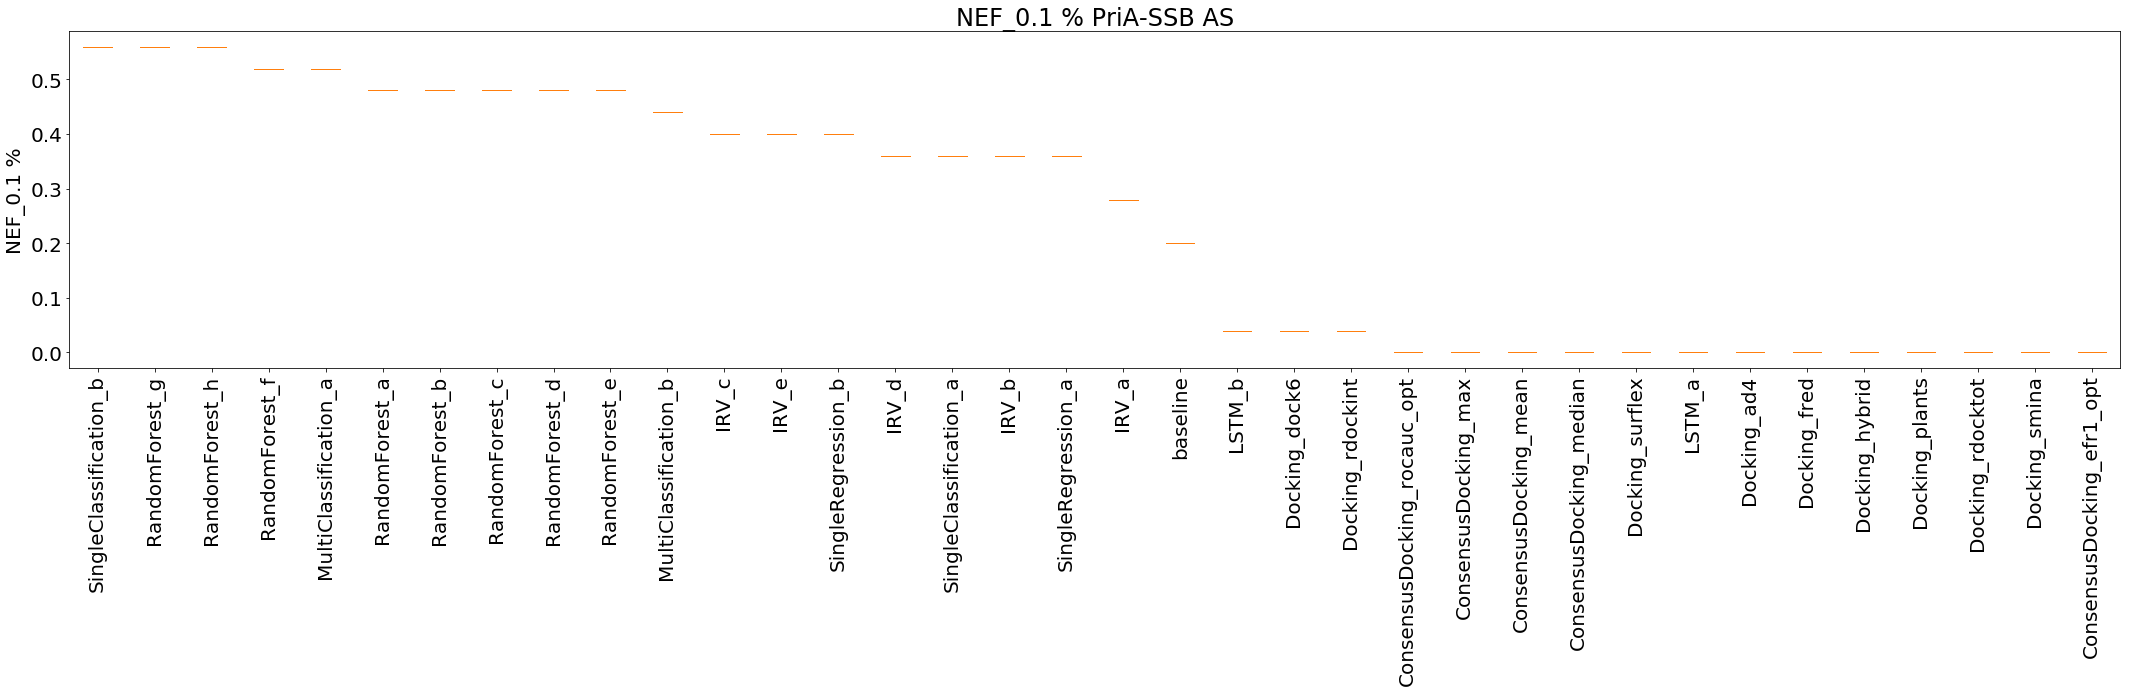

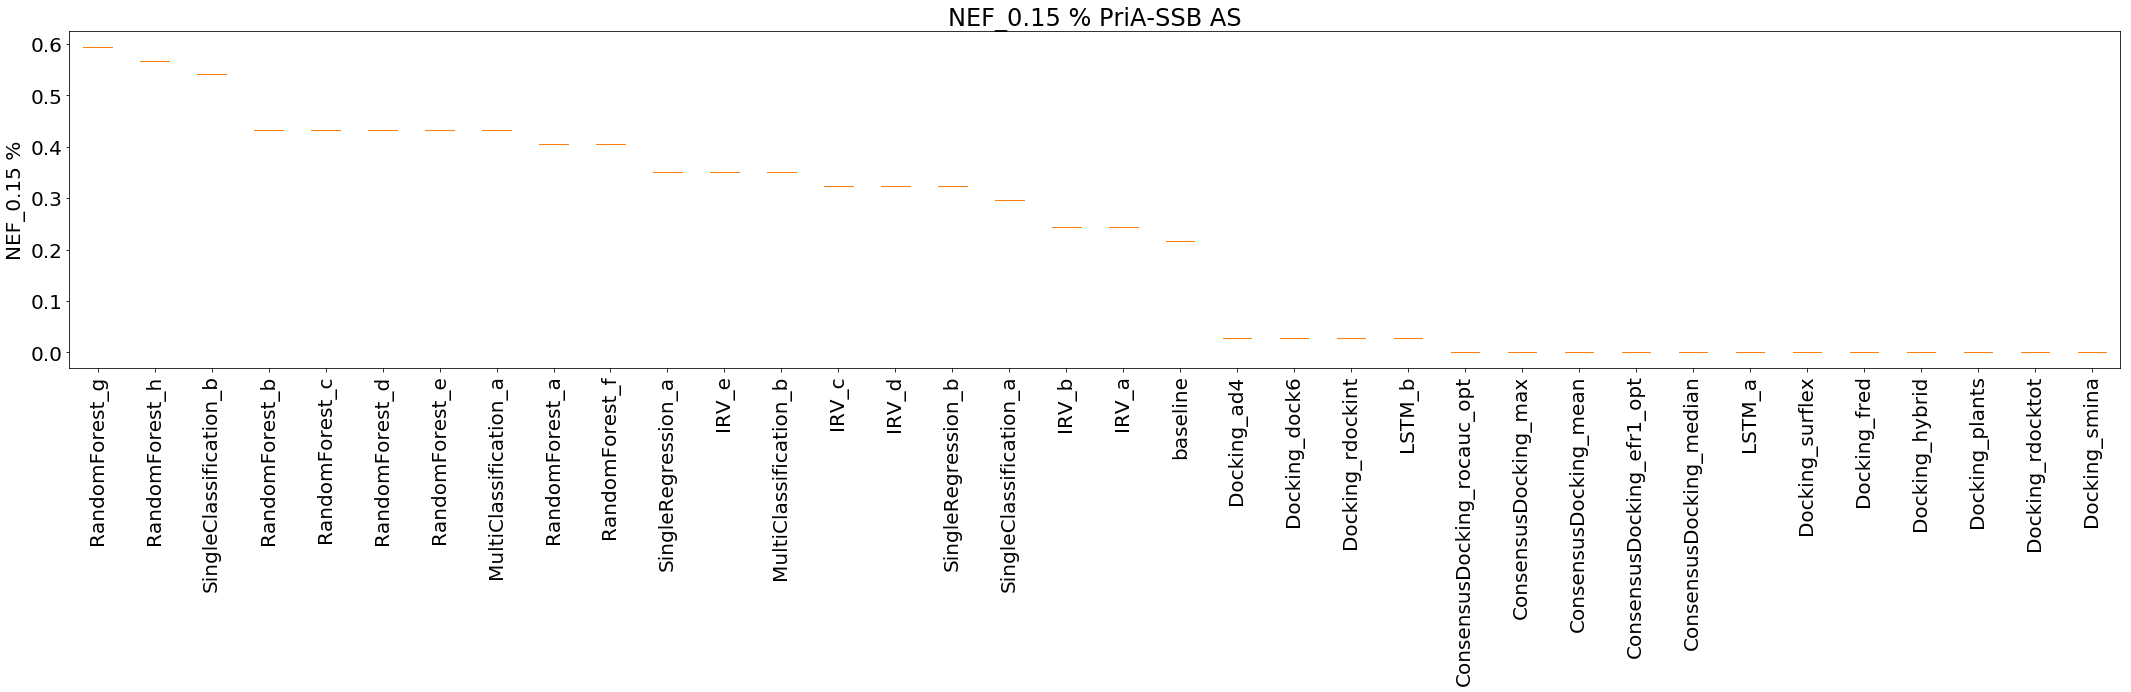

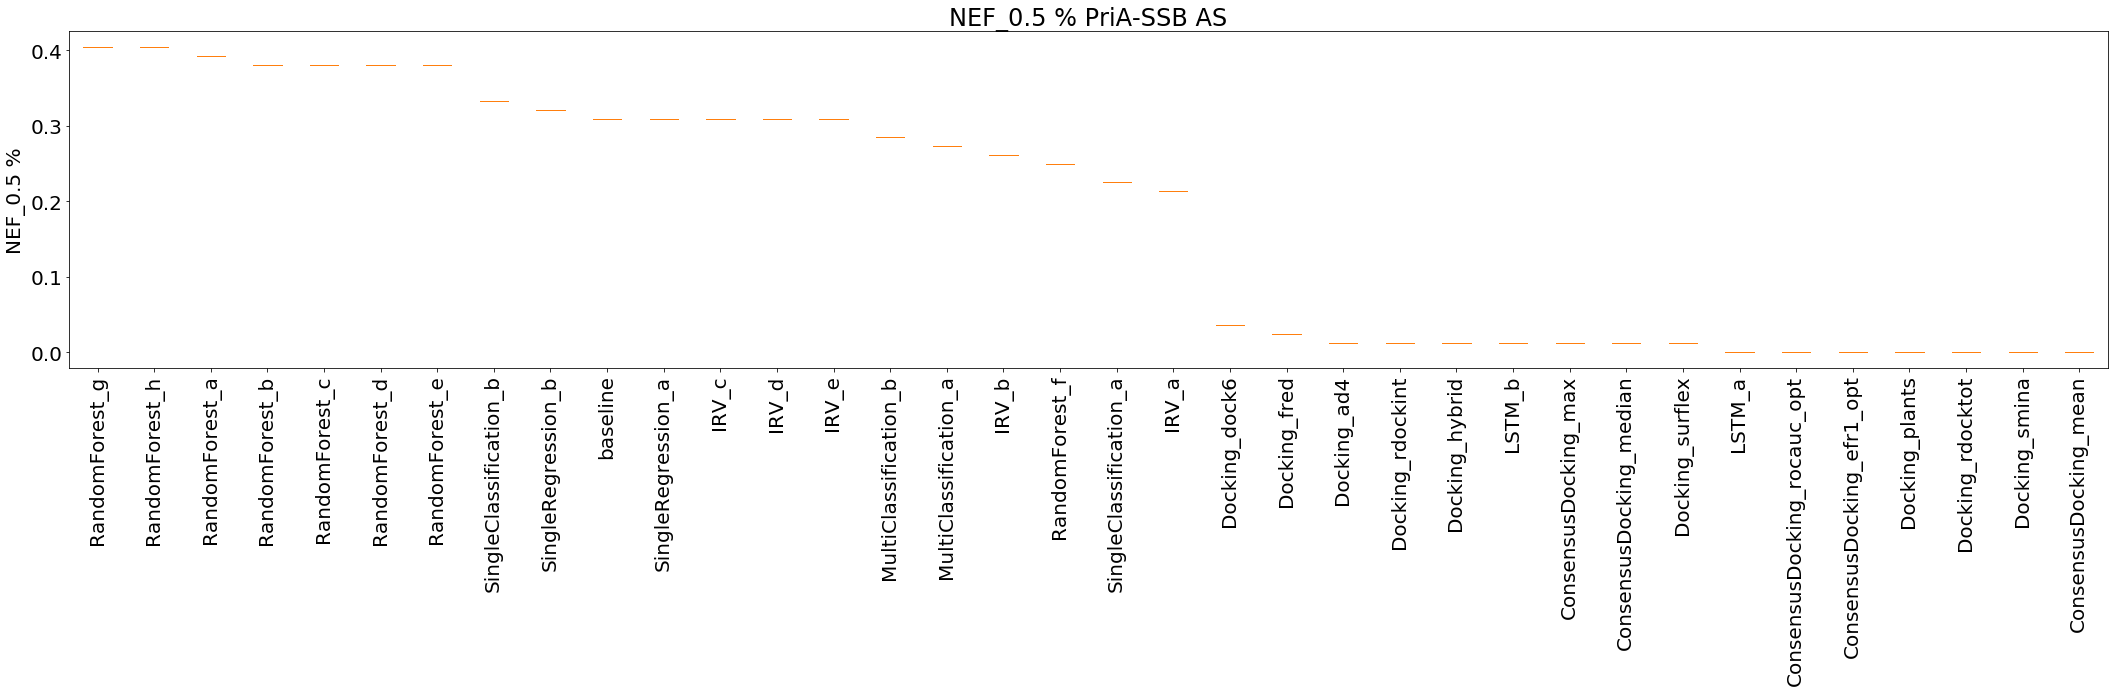

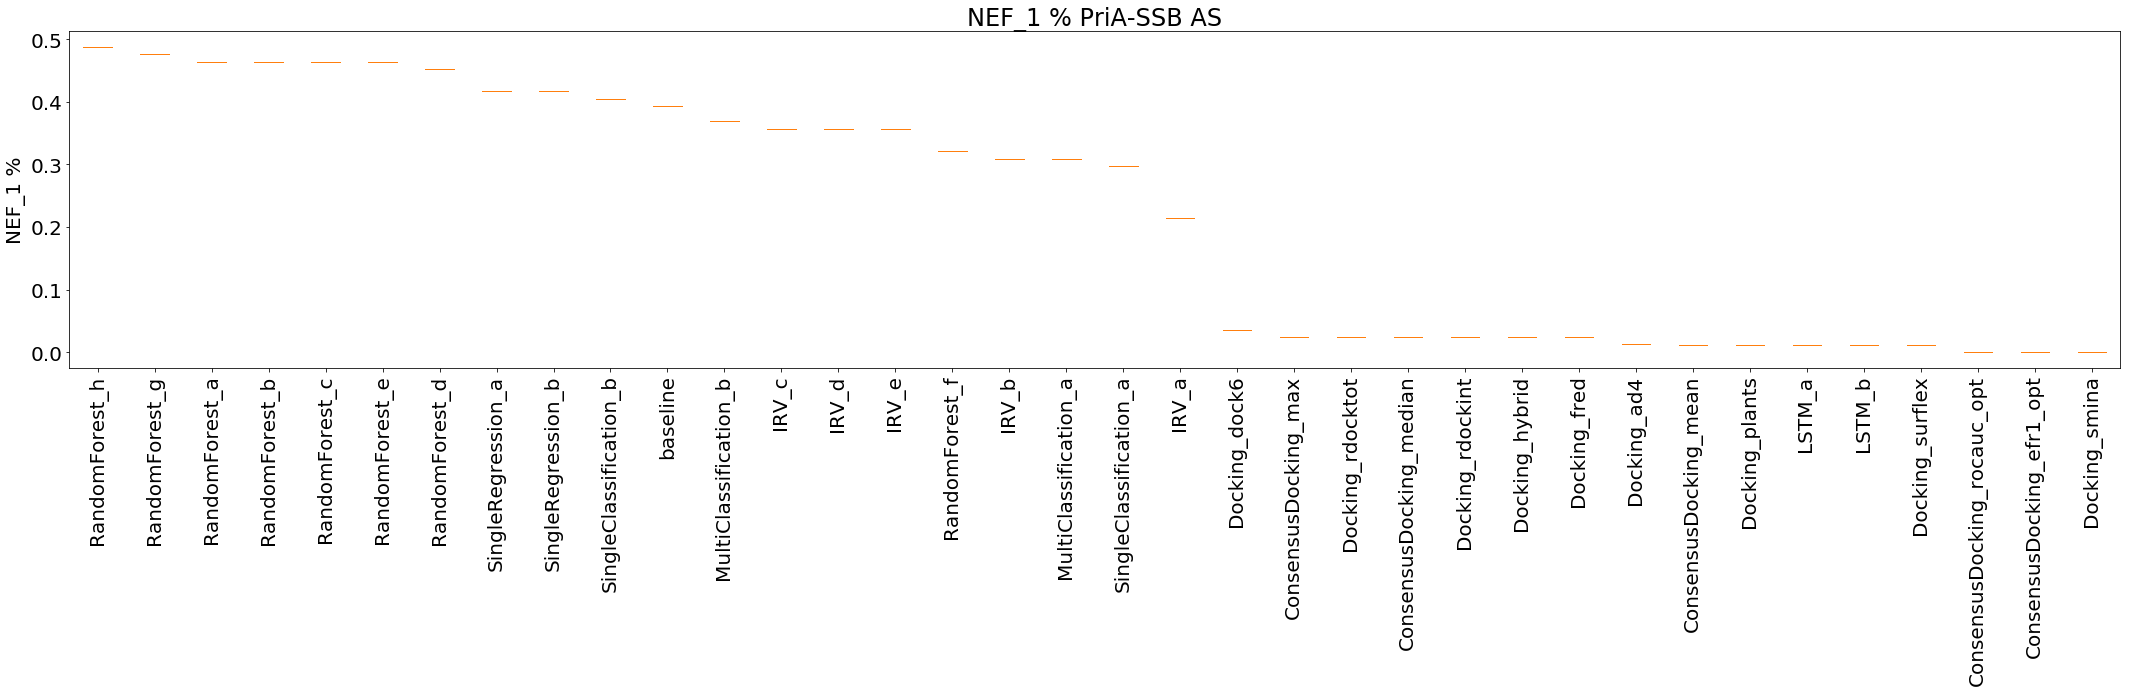

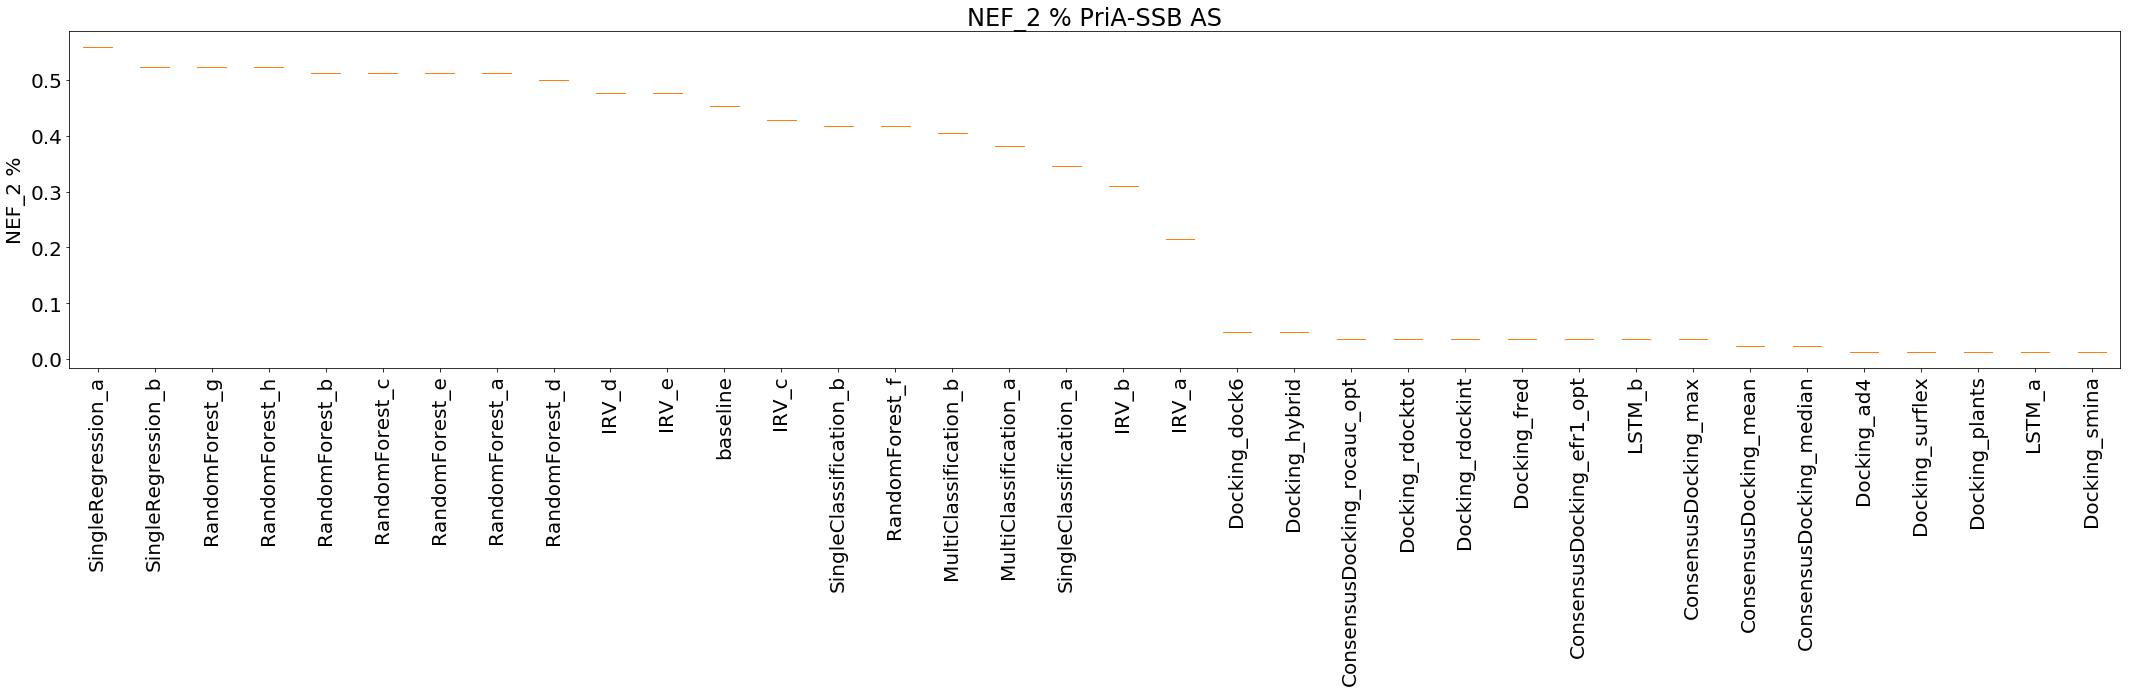

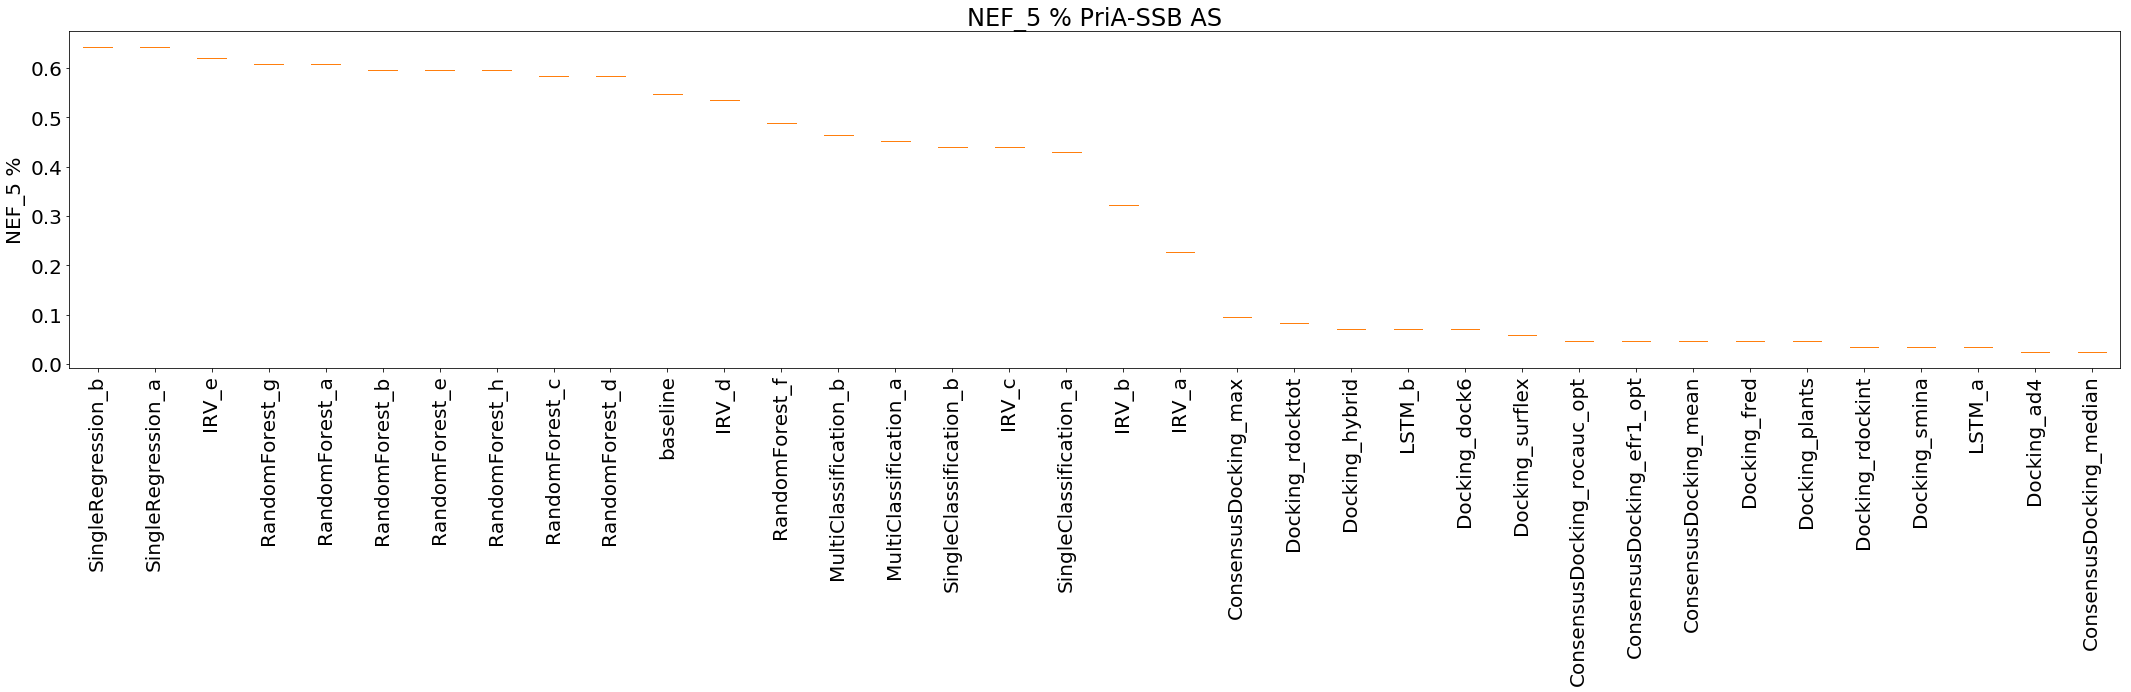

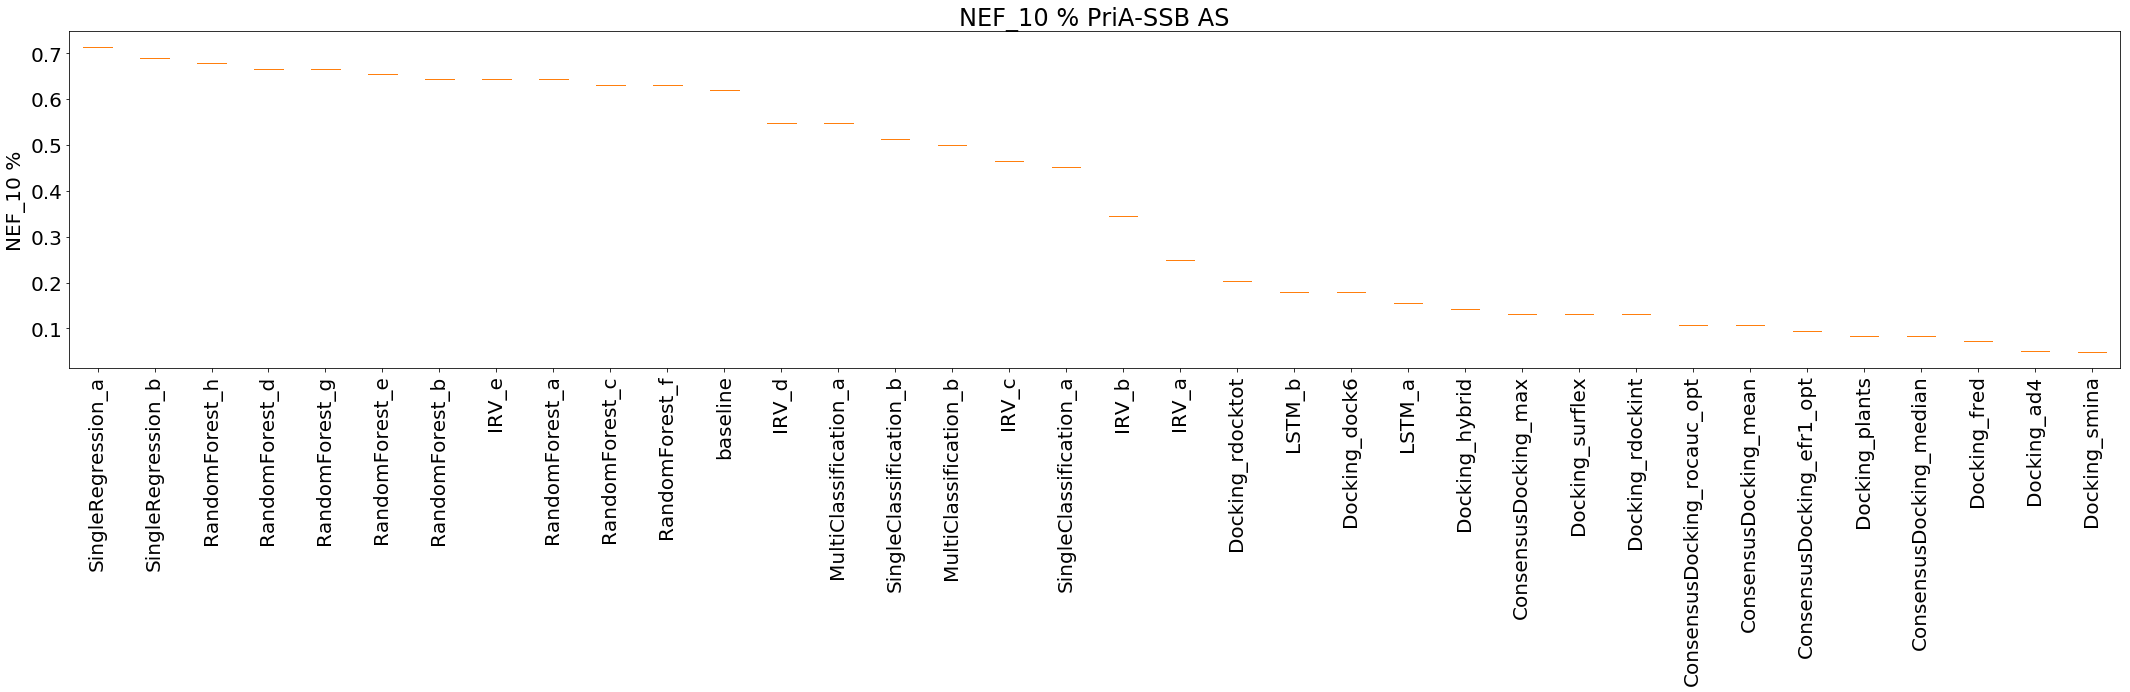

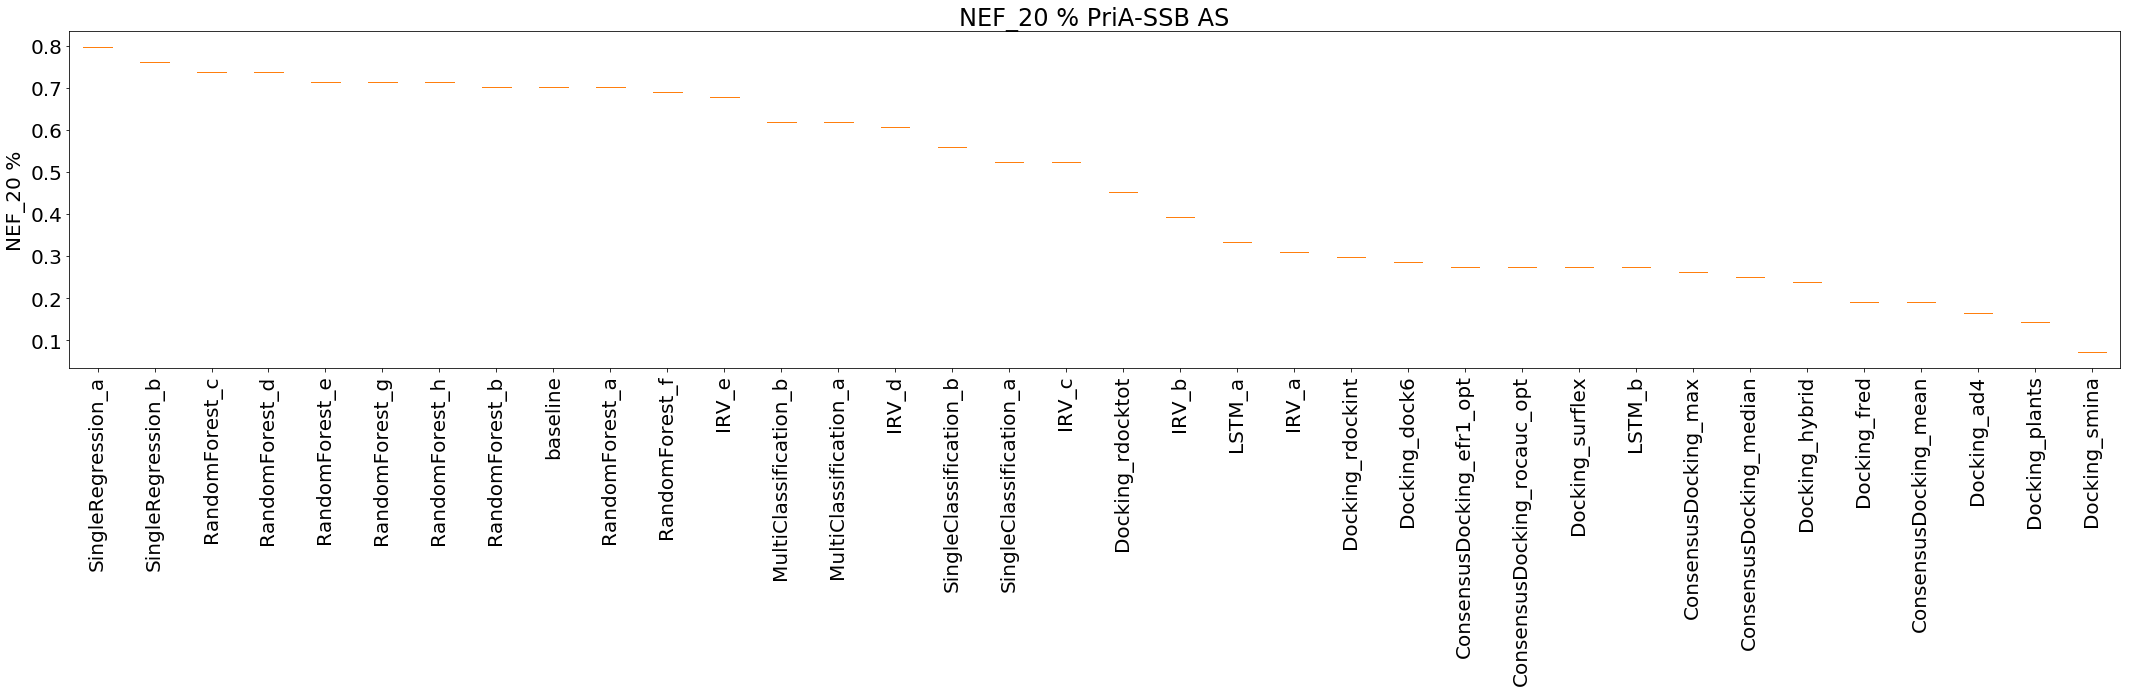

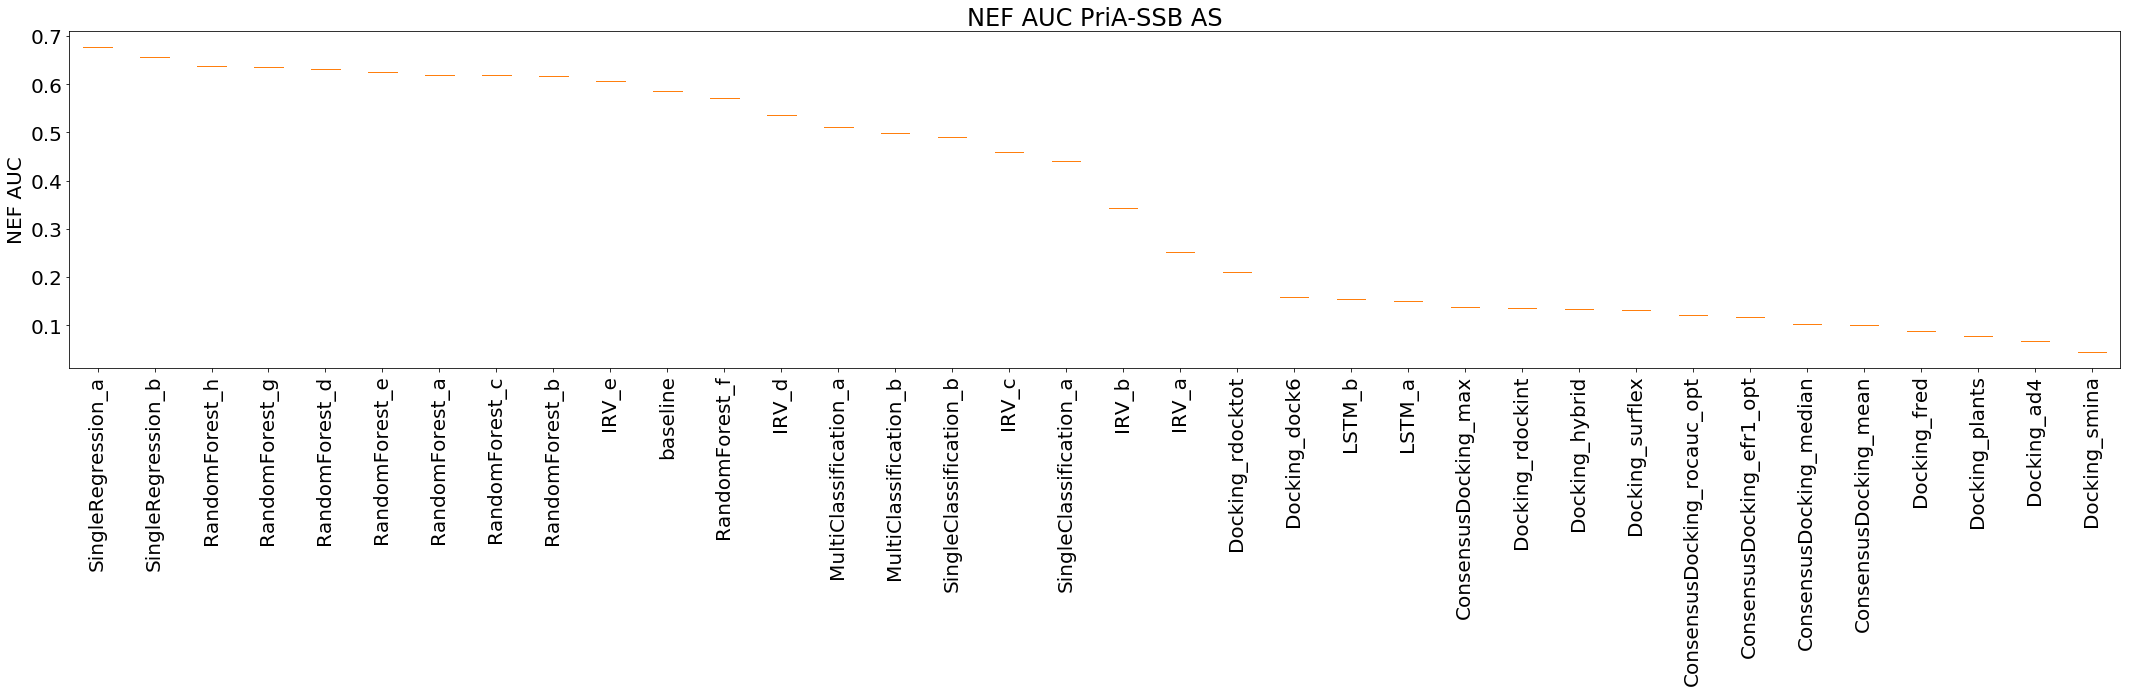

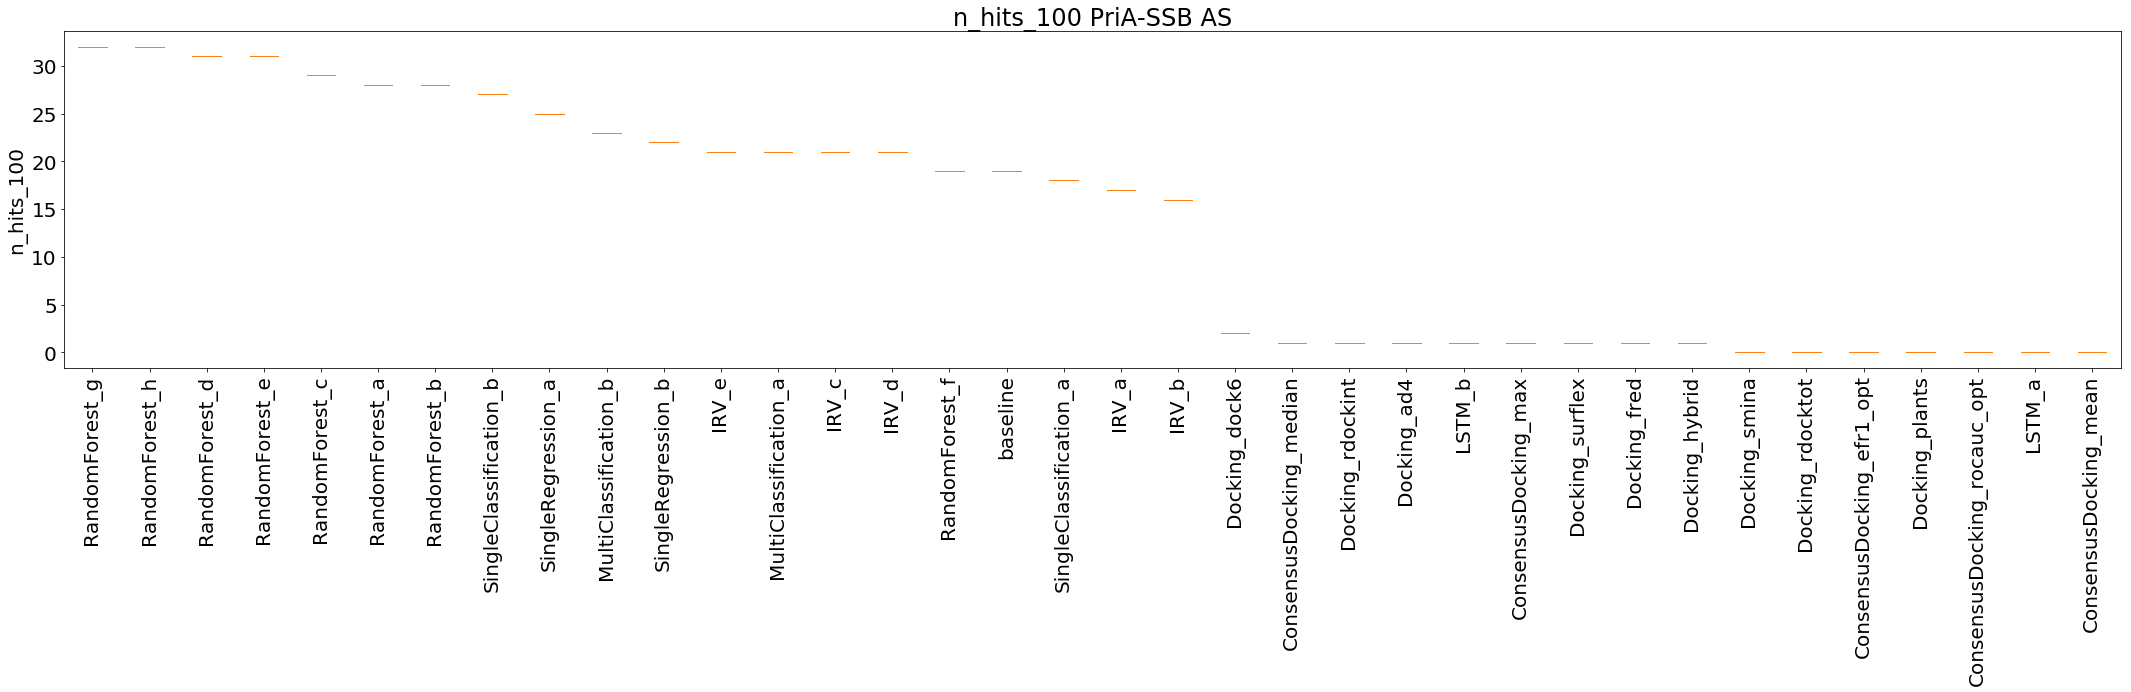

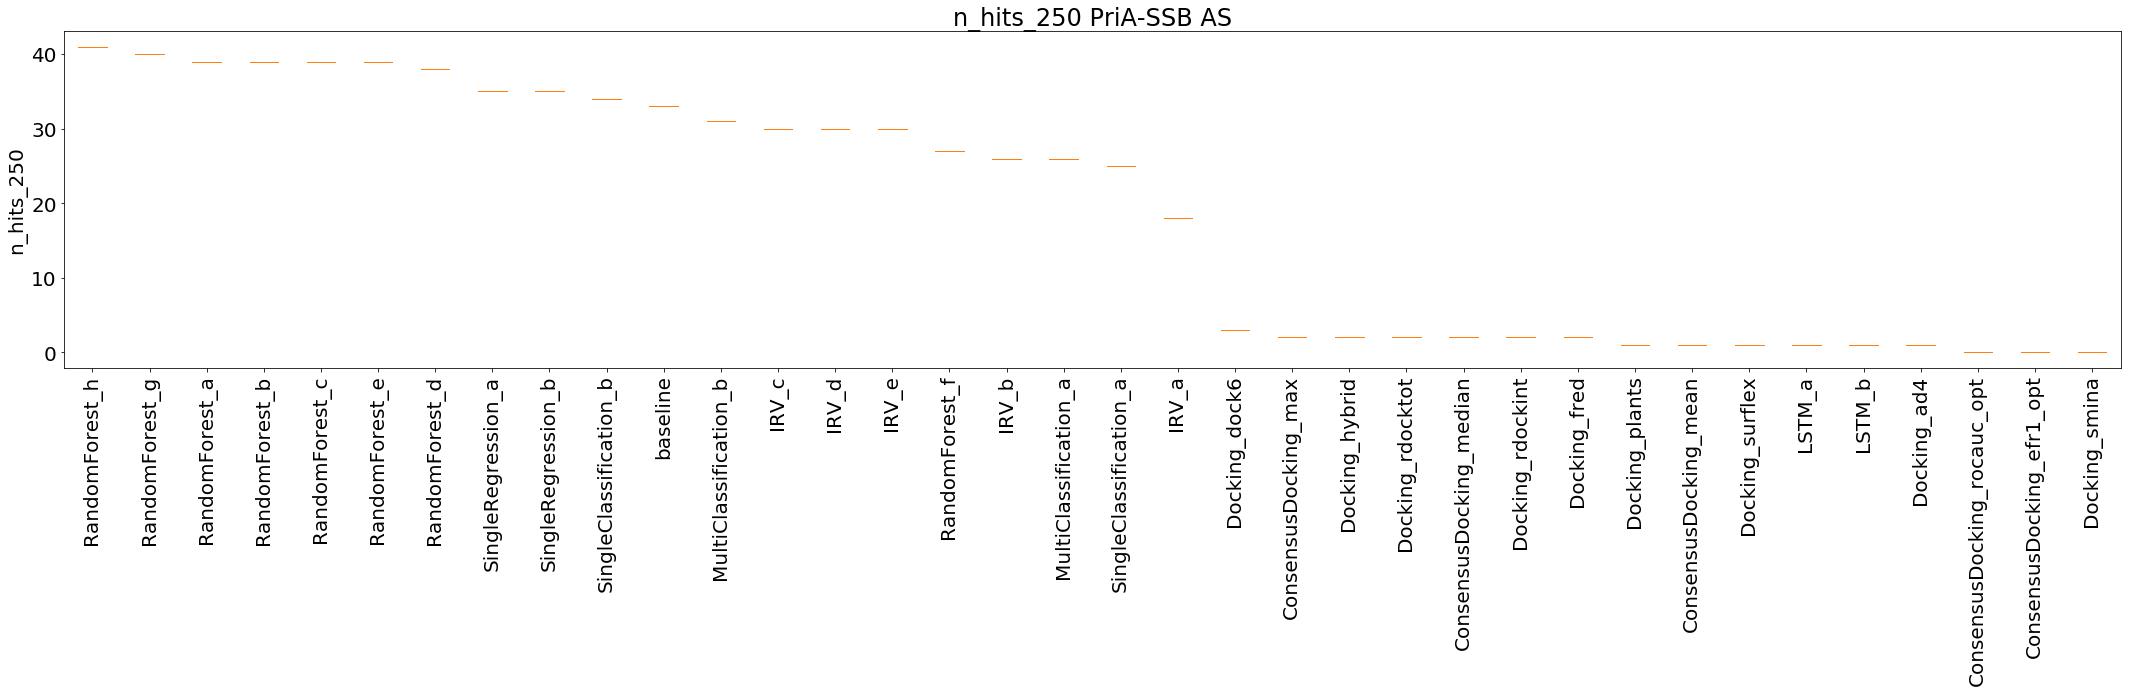

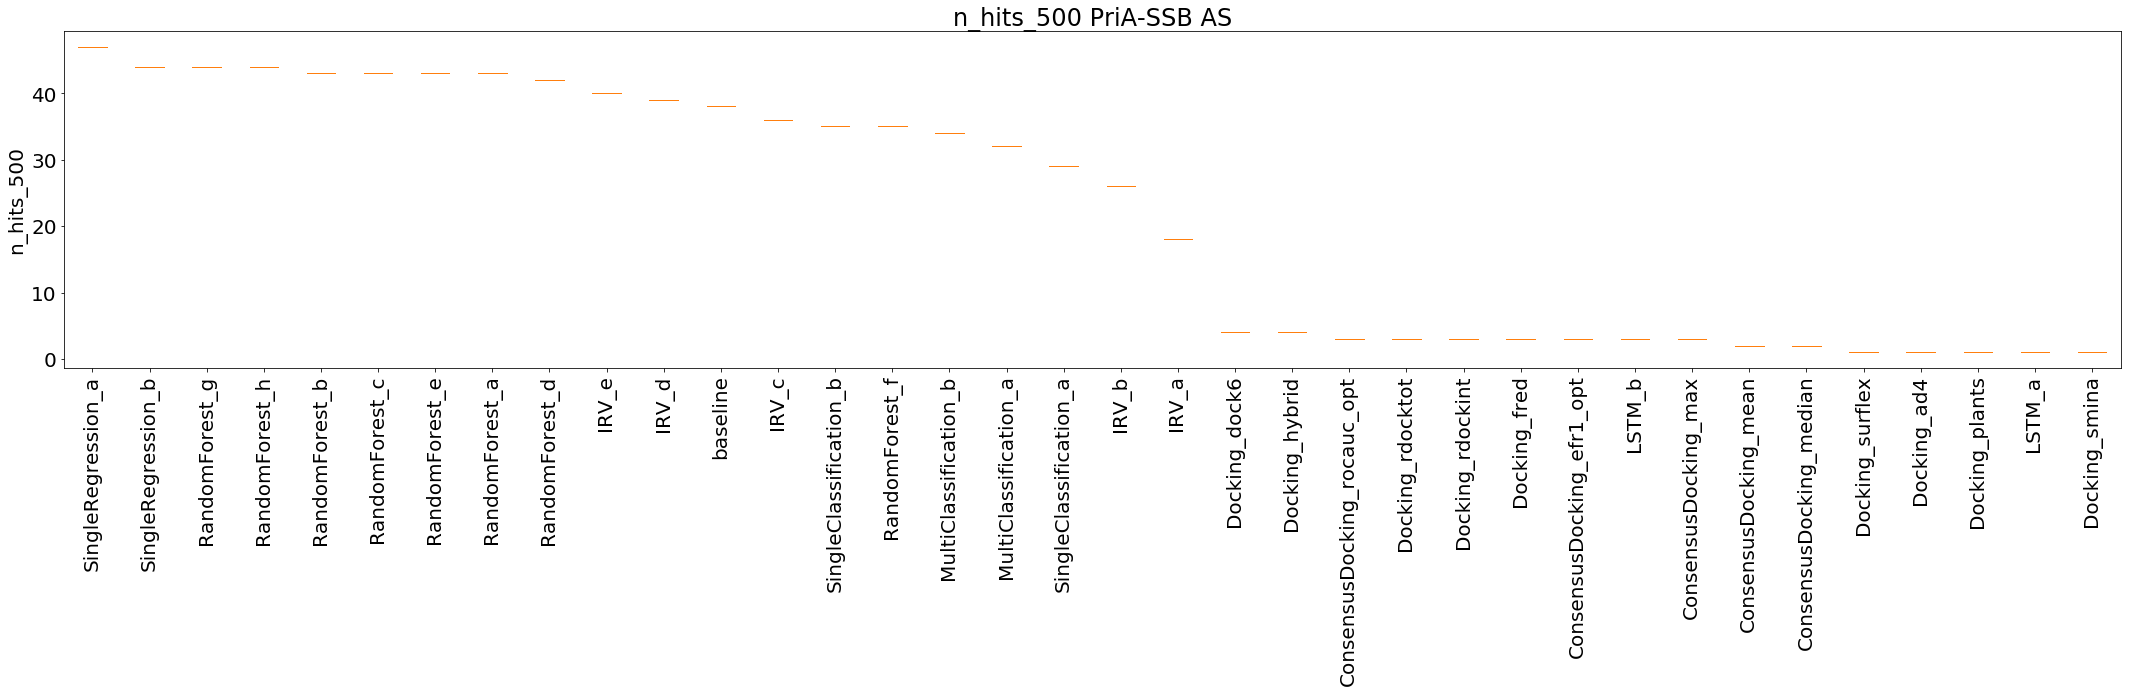

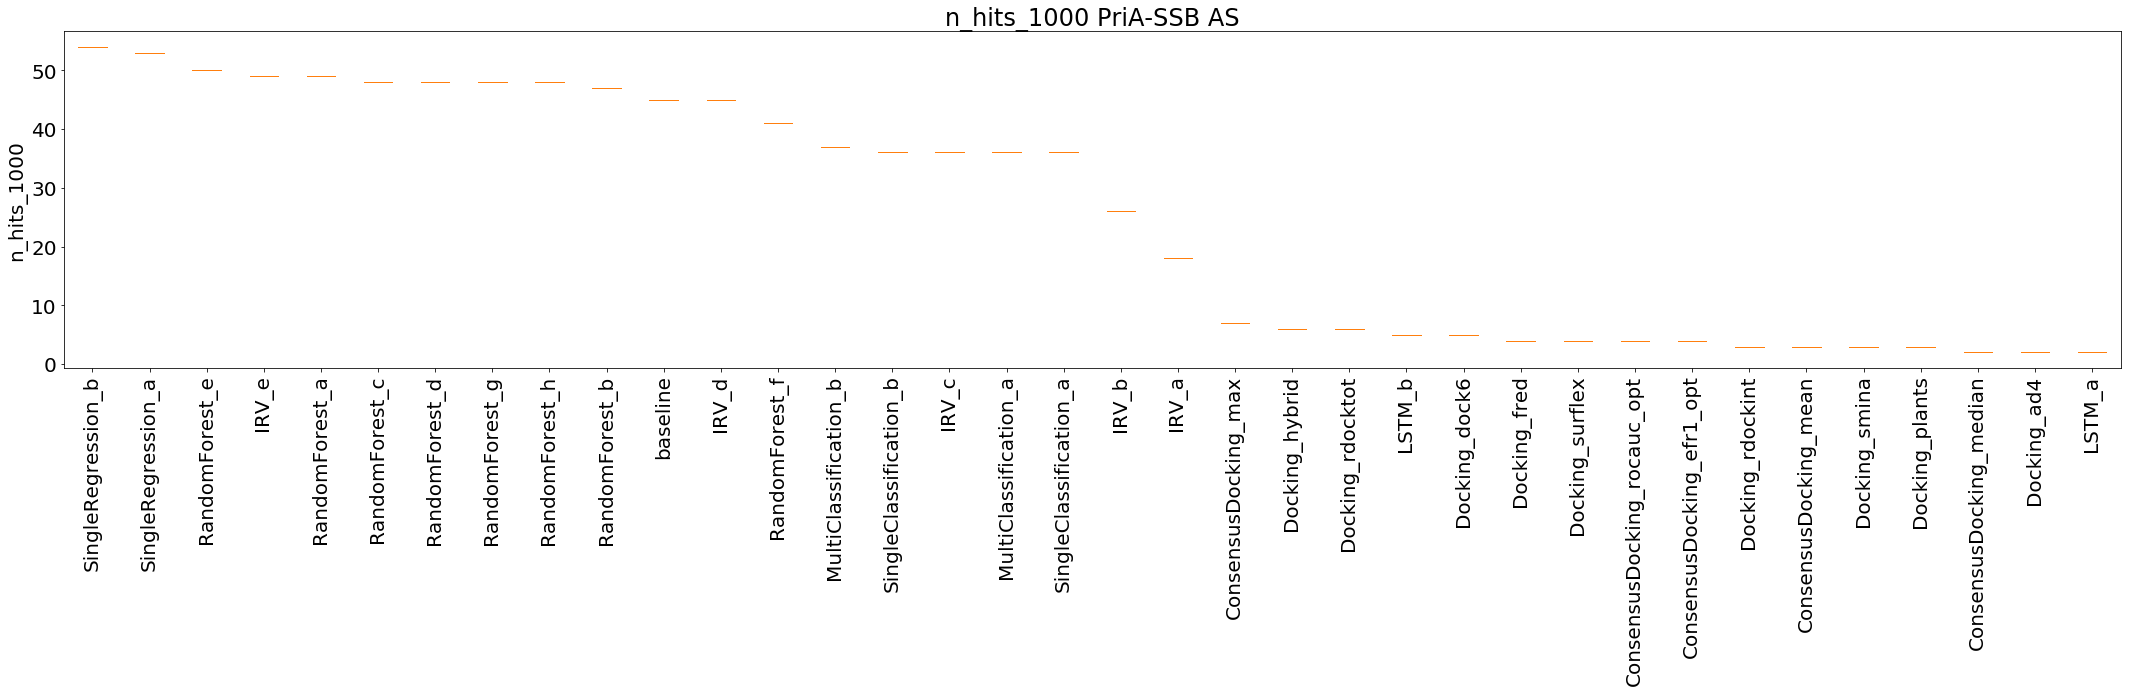

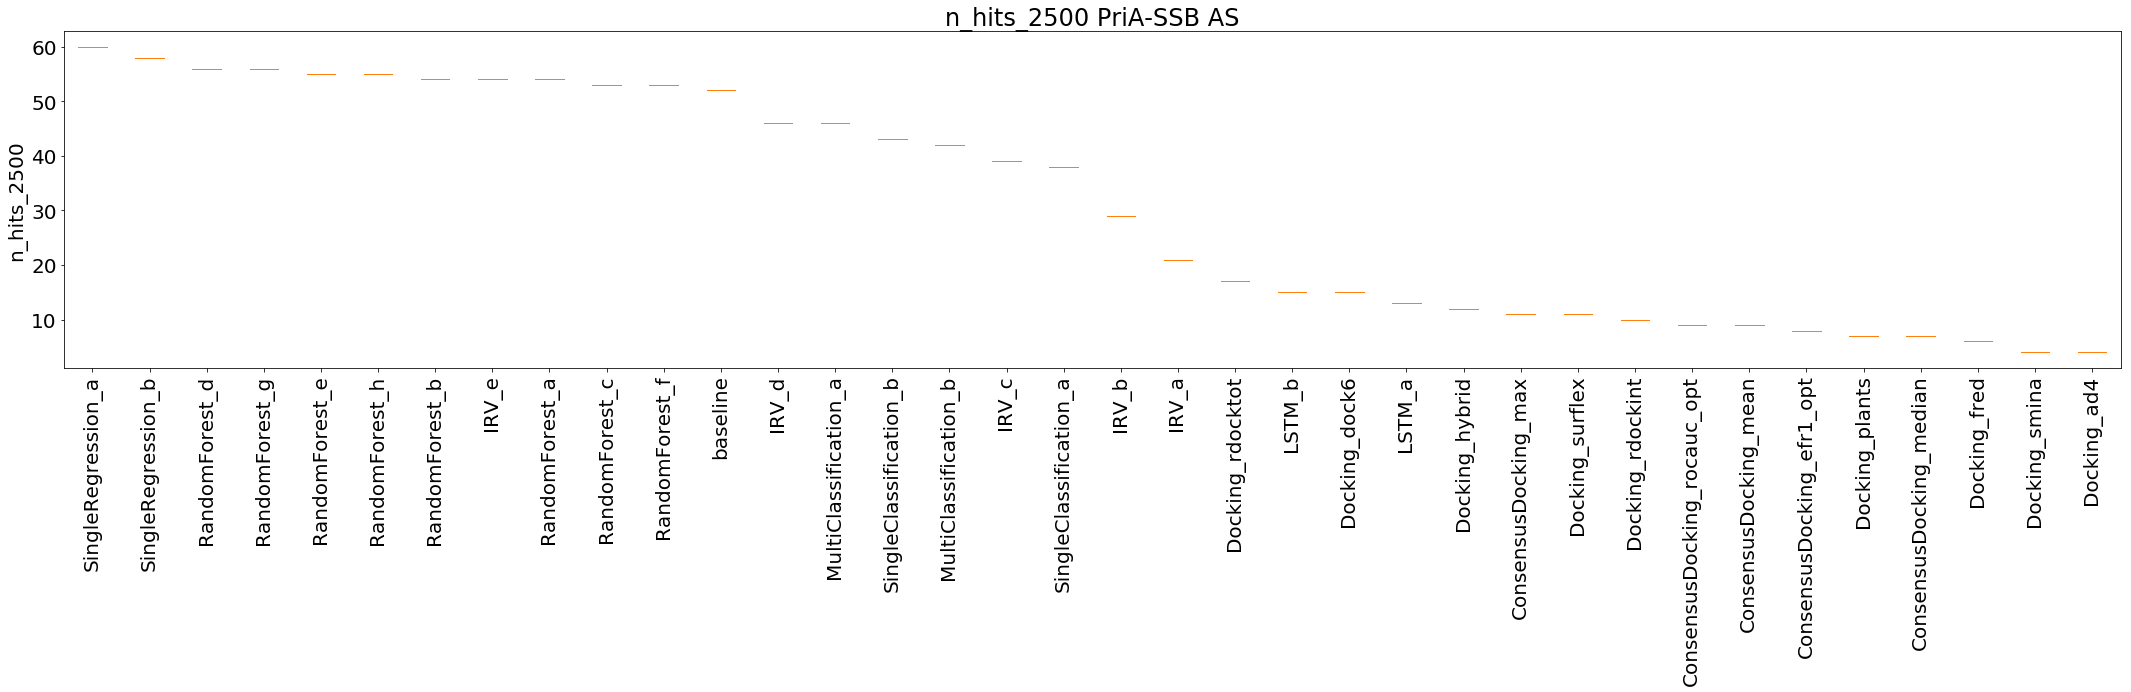

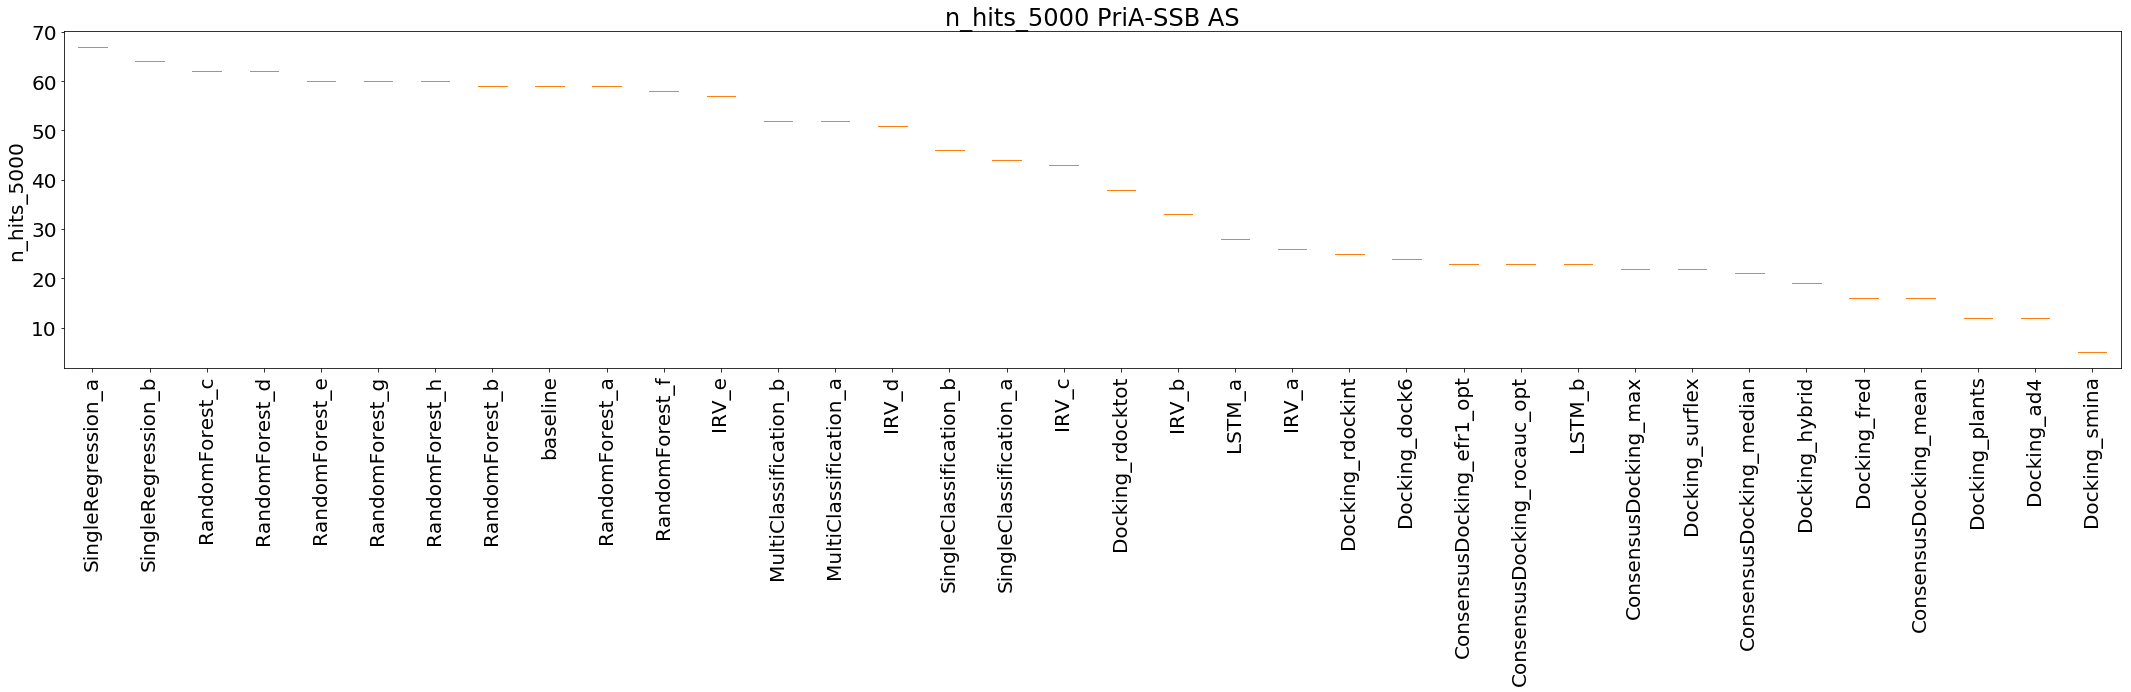

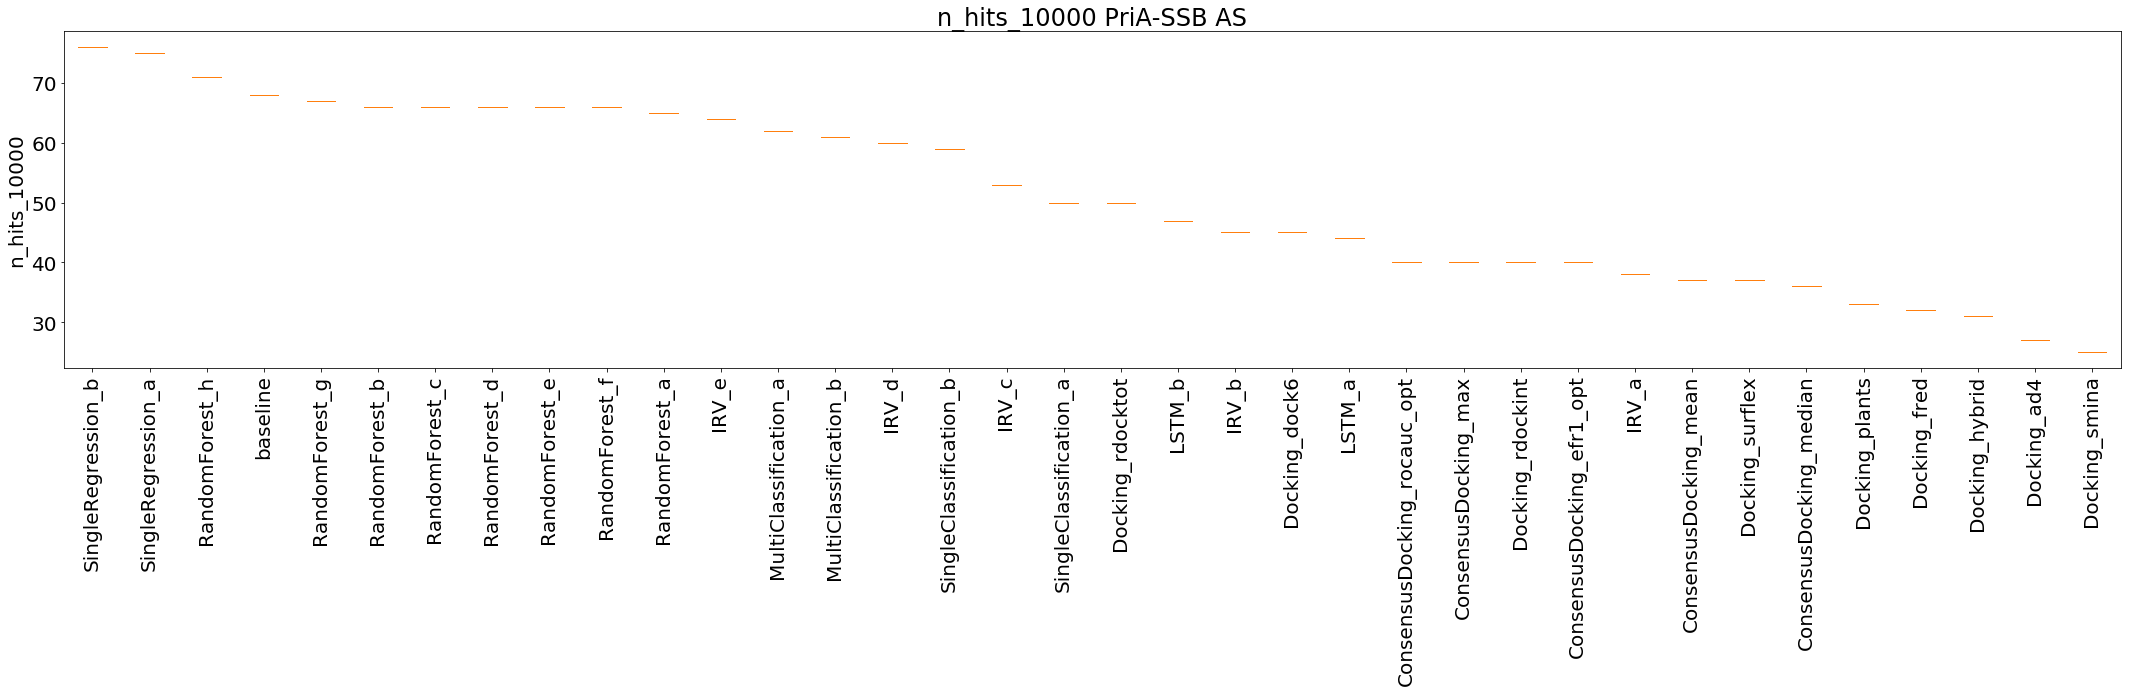

In [12]:
matplotlib.rcParams.update({'font.size': 20})
save_dir = './cv_ps_figures/ps_metric_plots_complete/'
labels=['PriA-SSB AS']
plot_metrics_bp(gather_df, metric_names, labels, save_dir)